<center>
    <img src=https://www.usine-digitale.fr/mediatheque/2/3/5/001002532_896x598_c.jpg" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Introduction
## Project: Predicting sleep variables in mammals
## Project Objectives:
To build a machine learning model to predict the sleeping attributes, total sleeping time and dreaming time of mammals taking into account their general, ecological and biological attributes.
## Members : 
### Brandt Olson, Sourena Mohit Tabatabaie, Kawtar Abidine, Hugo Beffeyte, Mohamed Jouhari

# Exploratory Analysis of The Data

<span style="color:green;font-weight:700;font-size:24px"> STEP 1: Dataset Preprocessing
</span>

<span style="color:blue;font-weight:700;font-size:20px">1 - Importing the libraries
</span>

In [1]:
#! pip install filename

In [2]:
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

init_notebook_mode(connected=True)  # Initialize notebook for offline plot

from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from scipy.stats import anderson, kstest, shapiro

<span style="color:blue;font-weight:700;font-size:20px">2 - Importing the dataset and redefine it 
</span>

<h3>Read/Save Other Data Formats</h3>

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |


In [95]:
file_path = 'data/sleep_merged.csv'

df = pd.read_csv(file_path)

# Display the class of the DataFrame
print(type(df))  # <class 'pandas.core.frame.DataFrame'>

# Display the number of rows and columns in the DataFrame
print(df.shape)  # Not right shape !

# Display the DataFrame
print(df)

<class 'pandas.core.frame.DataFrame'>
(87, 16)
              Species        Genus           Order   Vore  Conservation  \
0             Cheetah     Acinonyx       Carnivora  carni            lc   
1   Northern fur seal  Callorhinus       Carnivora  carni            vu   
2                Lion     Panthera       Carnivora  carni            vu   
3               Tiger     Panthera       Carnivora  carni            en   
4        Caspian seal        Phoca       Carnivora  carni            vu   
..                ...          ...             ...    ...           ...   
82              Horse        Equus  Perissodactyla  herbi  domesticated   
83            Giraffe      Giraffa    Artiodactyla  herbi            cd   
84              Human         Homo        Primates   omni           NaN   
85     Asian elephant      Elephas     Proboscidea  herbi            en   
86   African elephant    Loxodonta     Proboscidea  herbi            vu   

      BodyWt  BrainWt  TotalSleep  Awake  NonDreamin

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<h4>Find the name of the columns of the dataframe.</h4>
    make a copy of dataframe to work with.
</div>

In [96]:
df_copy = copy.deepcopy(df)

In [97]:
cols = df.columns

In [98]:
cols

Index(['Species', 'Genus', 'Order', 'Vore', 'Conservation', 'BodyWt',
       'BrainWt', 'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger'],
      dtype='object')

<span style="color:blue;font-weight:700;font-size:20px">3 - Basic Insight of Dataset
</span>
<p>
After reading data into Pandas dataframe, it is time for us to explore the dataset.<br>

There are several ways to obtain essential insights of the data to help us better understand our dataset.

</p>

<h4>Data Types</h4>
<p>
Data has a variety of types.<br>

The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:

</p>

In [99]:
df.dtypes

Species          object
Genus            object
Order            object
Vore             object
Conservation     object
BodyWt          float64
BrainWt         float64
TotalSleep      float64
Awake           float64
NonDreaming     float64
Dreaming        float64
LifeSpan        float64
Gestation       float64
Predation       float64
Exposure        float64
Danger          float64
dtype: object

<h4>Describe</h4>
statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we use the describe method
This method will provide various summary statistics, excluding <code>NaN</code> (Not a Number) values.


In [100]:
df.describe()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,80.000000,83.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,19.620000,134.577108,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,17.896074,138.128453,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,1.300000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.375000,31.000000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.000000,70.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,27.250000,187.750000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


<p>
This shows the statistical summary of all numeric-typed (int, float) columns.<br>

For example, the attribute "BodyWt" has 87 counts, the mean value of this column is 161.38, the standard deviation is 768.8, the minimum value is 0.005 and the maximum value is 6654. <br>

However, what if we would also like to check all the columns including those that are of type object? <br><br>

add an argument <code>include = "all"</code> inside the bracket.

</p>

In [9]:
# describe all the columns in "df" 
df.describe(include = "all")

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87,87,87,87,58,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,80.000000,83.000000,58.000000,58.000000,58.000000
unique,87,80,19,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Cheetah,Panthera,Rodentia,herbi,lc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,22,37,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,19.620000,134.577108,2.844828,2.362069,2.586207
std,NaN,NaN,NaN,NaN,NaN,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,17.896074,138.128453,1.496214,1.575005,1.426989
min,NaN,NaN,NaN,NaN,NaN,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,1.300000,12.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.375000,31.000000,2.000000,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.000000,70.000000,3.000000,2.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,27.250000,187.750000,4.000000,4.000000,4.000000


<p>
Now it provides the statistical summary of all the columns, including object-typed attributes.<br>

We can now see how many unique values there, which one is the top value and the frequency of top value in the object-typed columns.<br>

Some values in the table above show as "NaN". This is because those numbers are not available regarding a particular column type.<br>

</p>

<h4>Info</h4>
Another method you can use to check your dataset is: dataframe.info()
It provides a concise summary of your DataFrame.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [10]:
# look at the info of "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       87 non-null     object 
 1   Genus         87 non-null     object 
 2   Order         87 non-null     object 
 3   Vore          87 non-null     object 
 4   Conservation  58 non-null     object 
 5   BodyWt        87 non-null     float64
 6   BrainWt       87 non-null     float64
 7   TotalSleep    87 non-null     float64
 8   Awake         87 non-null     float64
 9   NonDreaming   47 non-null     float64
 10  Dreaming      63 non-null     float64
 11  LifeSpan      80 non-null     float64
 12  Gestation     83 non-null     float64
 13  Predation     58 non-null     float64
 14  Exposure      58 non-null     float64
 15  Danger        58 non-null     float64
dtypes: float64(11), object(5)
memory usage: 11.0+ KB


<span style="color:green;font-weight:700;font-size:24px"> STEP 2: Data Wrangling </span>

<span style="color:blue;font-weight:700;font-size:20px">1 - Changing the Encoding of Categorical Features and Analysis
</span>

<h4 id="indicator">Indicator Variable (or Dummy Variable)</h4>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>

<div style="background-color:#ADD8E6; padding: 18px;">
<b>Vore Column Encoding</b>
</div>

In [101]:
# Display unique values in the 'vore' column
unique_vore_values = df['Vore'].unique()
print("Unique values in 'vore' column:", unique_vore_values)


Unique values in 'vore' column: ['carni' 'herbi' 'omni' 'insecti']


##### We one-hot encode our vore feature to make it usable in our ML models

In [102]:
# Perform one-hot encoding on the 'vore' column
df = pd.get_dummies(df, columns=['Vore'], prefix='Vore',drop_first=True)

print("Updated DataFrame with one-hot encoding:")
print(df)


Updated DataFrame with one-hot encoding:
              Species        Genus           Order  Conservation    BodyWt  \
0             Cheetah     Acinonyx       Carnivora            lc    50.000   
1   Northern fur seal  Callorhinus       Carnivora            vu    20.490   
2                Lion     Panthera       Carnivora            vu   161.499   
3               Tiger     Panthera       Carnivora            en   162.564   
4        Caspian seal        Phoca       Carnivora            vu    86.000   
..                ...          ...             ...           ...       ...   
82              Horse        Equus  Perissodactyla  domesticated   521.000   
83            Giraffe      Giraffa    Artiodactyla            cd   899.995   
84              Human         Homo        Primates           NaN    62.000   
85     Asian elephant      Elephas     Proboscidea            en  2547.000   
86   African elephant    Loxodonta     Proboscidea            vu  6654.000   

    BrainWt  TotalSlee

to use the 'vore' column as a feature in regression models, and it contains boolean values representing some binary attribute, it's common to convert them to 0 and 1 before using them in the regression model. This conversion allows you to treat them as numerical variables.

In [103]:
# Convert boolean values to 0 and 1 for the specified columns
bool_columns = ['Vore_omni', 'Vore_herbi', 'Vore_insecti']
df[bool_columns] = df[bool_columns].astype(int)

# Print the updated DataFrame with one-hot encoding and converted boolean values
print("Updated DataFrame with one-hot encoding and converted boolean values:")
print(df)

Updated DataFrame with one-hot encoding and converted boolean values:
              Species        Genus           Order  Conservation    BodyWt  \
0             Cheetah     Acinonyx       Carnivora            lc    50.000   
1   Northern fur seal  Callorhinus       Carnivora            vu    20.490   
2                Lion     Panthera       Carnivora            vu   161.499   
3               Tiger     Panthera       Carnivora            en   162.564   
4        Caspian seal        Phoca       Carnivora            vu    86.000   
..                ...          ...             ...           ...       ...   
82              Horse        Equus  Perissodactyla  domesticated   521.000   
83            Giraffe      Giraffa    Artiodactyla            cd   899.995   
84              Human         Homo        Primates           NaN    62.000   
85     Asian elephant      Elephas     Proboscidea            en  2547.000   
86   African elephant    Loxodonta     Proboscidea            vu  6654.0

In [104]:
# add the Vore Column itself again to dataset
df["Vore"] = df_copy["Vore"]

In [105]:
# Update the Columns Variable
cols = df.columns

In [106]:
cols

Index(['Species', 'Genus', 'Order', 'Conservation', 'BodyWt', 'BrainWt',
       'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan',
       'Gestation', 'Predation', 'Exposure', 'Danger', 'Vore_herbi',
       'Vore_insecti', 'Vore_omni', 'Vore'],
      dtype='object')

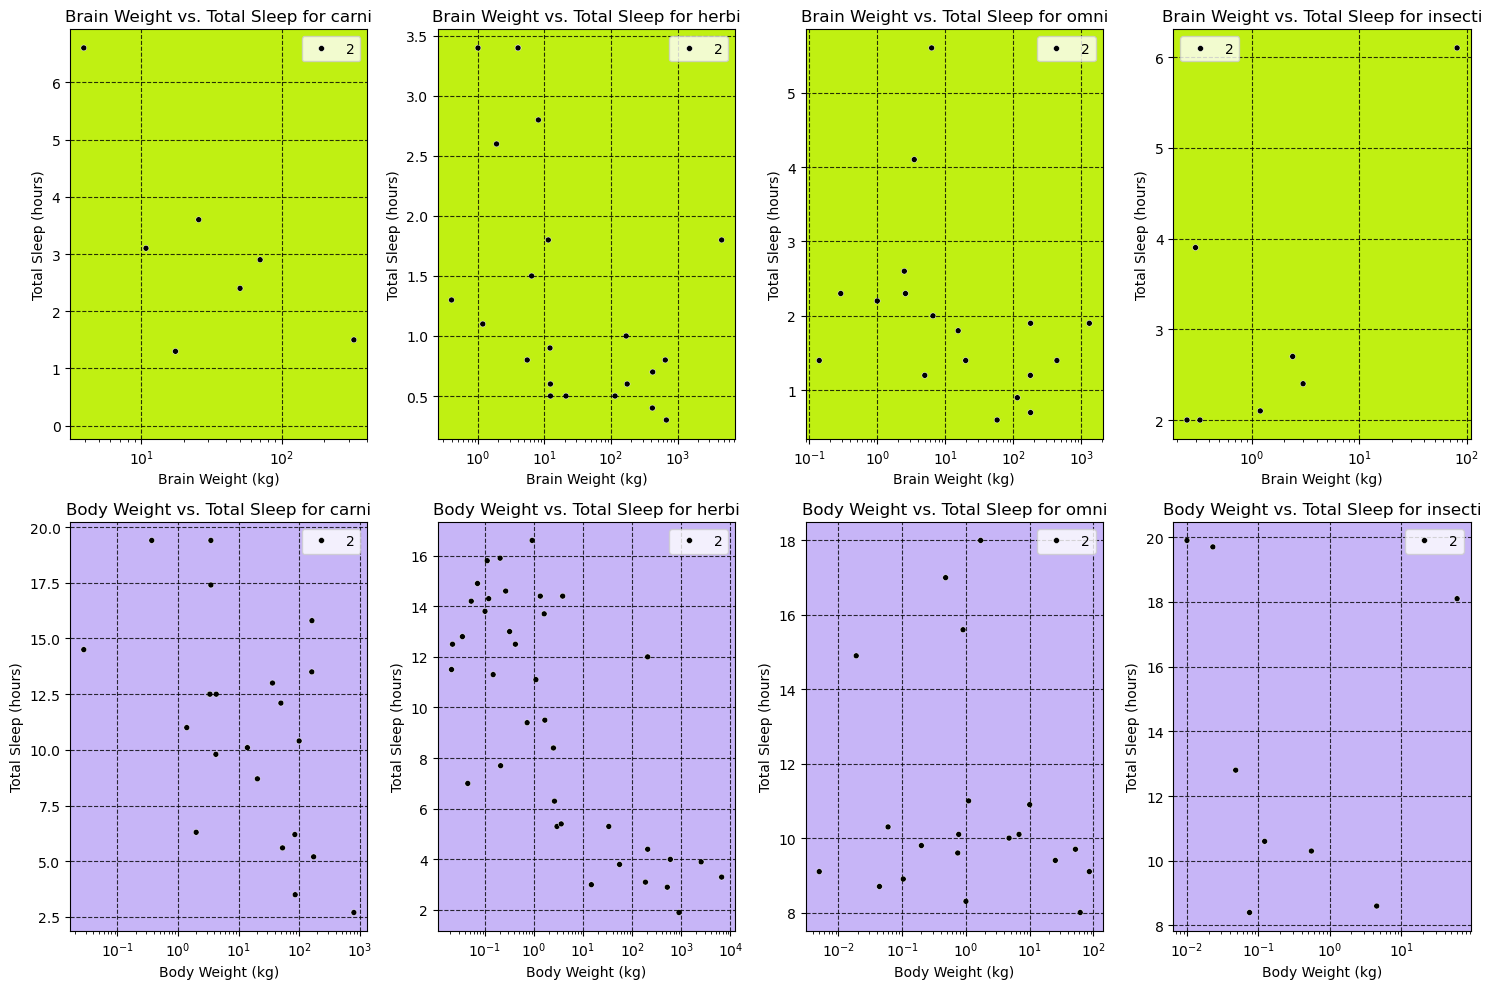

In [17]:
unique_vore = df["Vore"].unique()

# Create subplots
fig, axes = plt.subplots(2, len(unique_vore), figsize=(15, 10))

# Loop through each unique value in "Vore" and create scatter plots for Brain Weight vs. Total Sleep
for i, diet in enumerate(unique_vore):
    dff = df[df["Vore"] == diet]
    ax = axes[0, i]
    sns.scatterplot(data=dff, x='BrainWt', y='Dreaming', ax=ax, marker="o", size=2, color='black')
    ax.set_title(f"Brain Weight vs. Total Sleep for {diet}")
    ax.set_xlabel('Brain Weight (kg)')
    ax.set_ylabel('Total Sleep (hours)')
    ax.set_xscale('log')

    ax.set_facecolor('#C0F012')  # Dark background
    ax.grid(True, linestyle='--', alpha=0.8, color="black")

# Loop through each unique value in "Vore" and create scatter plots for Body Weight vs. Total Sleep
for i, diet in enumerate(unique_vore):
    dff = df[df["Vore"] == diet]
    ax = axes[1, i]
    sns.scatterplot(data=dff, x='BodyWt', y='TotalSleep', ax=ax, marker="o", size=2, color='black')
    ax.set_title(f"Body Weight vs. Total Sleep for {diet}")
    ax.set_xlabel('Body Weight (kg)')
    ax.set_ylabel('Total Sleep (hours)')
    ax.set_xscale('log')

    ax.set_facecolor('#C7B5F7')  # Dark background
    ax.grid(True, linestyle='--', alpha=0.8, color="black")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<div style="background-color:#ADD8E6; padding: 18px;">
<b>Species,Conservation and Order</b>
</div>

In [18]:
# Display unique values in the 'Order' column
unique_order_values = df['Order'].unique()
print("Unique values in 'order' column:", unique_order_values)

Unique values in 'order' column: ['Carnivora' 'Cetacea' 'Didelphimorphia' 'Diprotodontia' 'Pilosa'
 'Primates' 'Rodentia' 'Soricomorpha' 'Chiroptera' 'Erinaceomorpha'
 'Scandentia' 'Afrosoricida' 'Cingulata' 'Lagomorpha' 'Hyracoidea'
 'Monotremata' 'Artiodactyla' 'Perissodactyla' 'Proboscidea']


C:\Users\moham\AppData\Local\Temp\ipykernel_7632\39488587.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




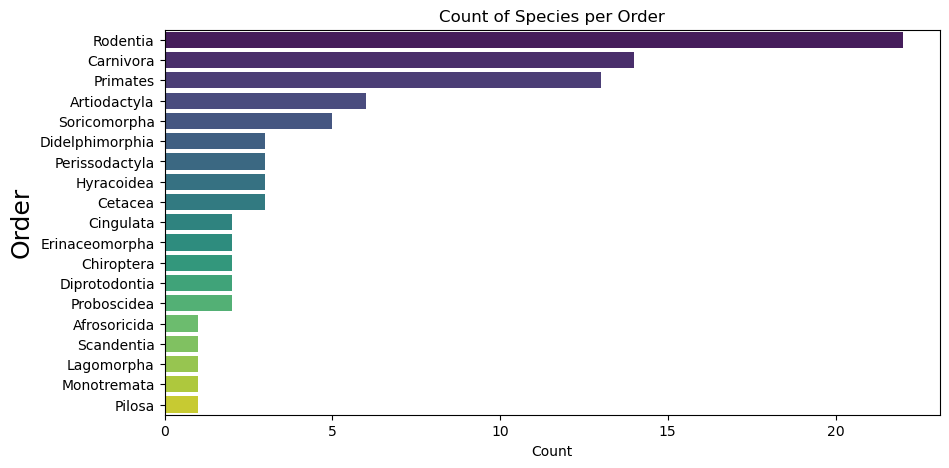

In [19]:
# Count of species per Order
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Order',order=df["Order"].value_counts().index, palette="viridis")
plt.title('Count of Species per Order')
plt.xlabel('Count')
plt.ylabel('Order', fontsize=18)
plt.show()

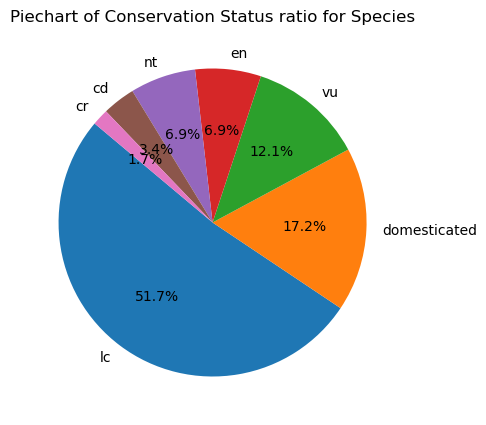

In [20]:
# Conservation status
plt.figure(figsize=(5, 5))
df['Conservation'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Piechart of Conservation Status ratio for Species')
plt.ylabel('')
plt.show()

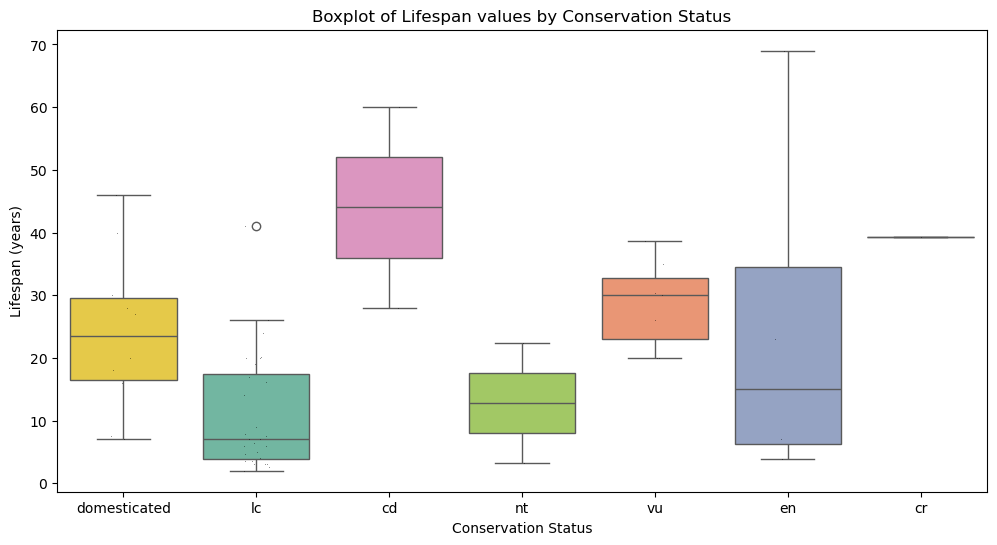

In [21]:
# Boxplot of Lifespan by Conservation status
order = ["domesticated","lc","cd","nt","vu","en","cr"]

plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df, x='Conservation', y='LifeSpan', linewidth=1, palette="Set2", showfliers=True, hue='Conservation', order=order, legend=False)
sns.stripplot(data=df, y="LifeSpan", x="Conservation", color="black", size=0.4)

plt.title('Boxplot of Lifespan values by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Lifespan (years)')
plt.show()


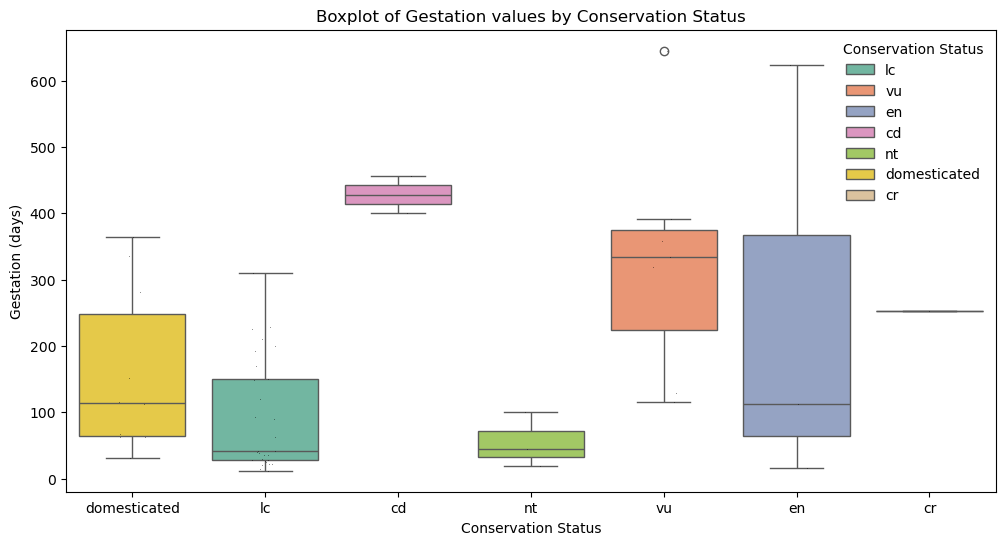

In [22]:
# Boxplot of Gestation by Conservation status
order = ["domesticated", "lc", "cd", "nt", "vu", "en", "cr"]

plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df, x='Conservation', y='Gestation', linewidth=1, palette="Set2", showfliers=True, hue='Conservation', order=order)
sns.stripplot(data=df, y="Gestation", x="Conservation", color="black", size=0.4)

plt.title('Boxplot of Gestation values by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Gestation (days)')
plt.legend(loc='upper right', title='Conservation Status', frameon=False)
plt.show()


#### There seemed to be a dependency between cd and gestation , but cd has only 2 records

In [23]:
print(df[df["Conservation"] == "cd"])

        Species          Genus         Order Conservation   BodyWt  BrainWt  \
5   Pilot whale  Globicephalus       Cetacea           cd  800.000      0.0   
83      Giraffe        Giraffa  Artiodactyla           cd  899.995    680.0   

    TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  Predation  \
5          2.7  21.35          NaN       0.1      60.0      456.0        NaN   
83         1.9  22.10          NaN       0.3      28.0      400.0        5.0   

    Exposure  Danger  Vore_herbi  Vore_insecti  Vore_omni   Vore  
5        NaN     NaN           0             0          0  carni  
83       5.0     5.0           1             0          0  herbi  


In [24]:
df["Conservation_count"] = df.groupby("Conservation")["Conservation"].transform("count")

<Axes: xlabel='count', ylabel='Conservation'>

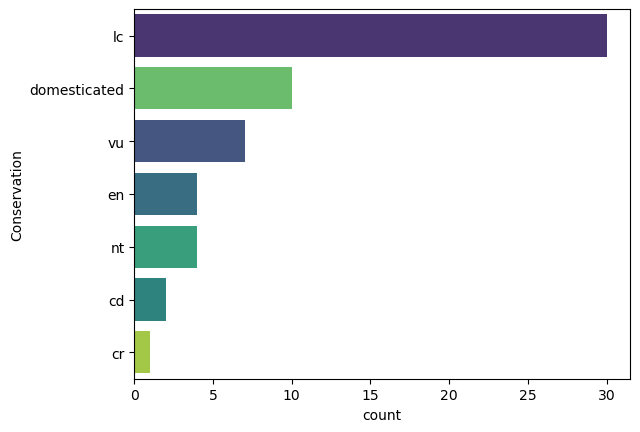

In [25]:
sns.countplot(data=df, y="Conservation", hue="Conservation", order=df['Conservation'].value_counts().index, palette="viridis", legend=False)

<span style="color:blue;font-weight:700;font-size:20px">2 - Identify missing data and Data Cleaning
</span>

<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [26]:
missing_data = df.isnull()
missing_data.head(5)

,Species,Genus,Order,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Vore_herbi,Vore_insecti,Vore_omni,Vore,Conservation_count
0,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>

In [27]:
df.isna().sum()

Species                0
Genus                  0
Order                  0
Conservation          29
BodyWt                 0
BrainWt                0
TotalSleep             0
Awake                  0
NonDreaming           40
Dreaming              24
LifeSpan               7
Gestation              4
Predation             29
Exposure              29
Danger                29
Vore_herbi             0
Vore_insecti           0
Vore_omni              0
Vore                   0
Conservation_count    29
dtype: int64

In [28]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Species
Species
False    87
Name: count, dtype: int64

Genus
Genus
False    87
Name: count, dtype: int64

Order
Order
False    87
Name: count, dtype: int64

Conservation
Conservation
False    58
True     29
Name: count, dtype: int64

BodyWt
BodyWt
False    87
Name: count, dtype: int64

BrainWt
BrainWt
False    87
Name: count, dtype: int64

TotalSleep
TotalSleep
False    87
Name: count, dtype: int64

Awake
Awake
False    87
Name: count, dtype: int64

NonDreaming
NonDreaming
False    47
True     40
Name: count, dtype: int64

Dreaming
Dreaming
False    63
True     24
Name: count, dtype: int64

LifeSpan
LifeSpan
False    80
True      7
Name: count, dtype: int64

Gestation
Gestation
False    83
True      4
Name: count, dtype: int64

Predation
Predation
False    58
True     29
Name: count, dtype: int64

Exposure
Exposure
False    58
True     29
Name: count, dtype: int64

Danger
Danger
False    58
True     29
Name: count, dtype: int64

Vore_herbi
Vore_herbi
False    87
Name: count, dtype: int

<div style="background-color:#ADD8E6; padding: 10px;">
Based on the summary above, each column has 87 rows of data and 9 out of 16 column contain missing values.

<ol>
    <li>"Conservation": <b>29 missing data</b></li>
    <li>"BrainWt": <b>23 missing data</b></li>
    <li>"NonDreaming": <b>40 missing data</b></li>
    <li>"Dreaming" : <b>24 missing data</b></li>
    <li>"LifeSpan": <b>33 missing data</b></li>
    <li>"Gestation": <b>33 missing data</b></li>
    <li>"Predation": <b>29 missing data</b></li>
    <li>"Exposure": <b>29 missing data</b></li>
    <li>"Danger": <b>29 missing data</b></li>
</ol>
</div>

In [29]:
# Calculate the percentage of missing values for each column
percent_missing = df.isnull().sum() * 100 / len(df)

# Create a DataFrame to store the results
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})

# Sort the DataFrame by missing percentage (if needed)
missing_value_df.sort_values('percent_missing', inplace=True)

# Display the results
print(missing_value_df)


                           column_name  percent_missing
Species                        Species         0.000000
Genus                            Genus         0.000000
Order                            Order         0.000000
Vore_omni                    Vore_omni         0.000000
BodyWt                          BodyWt         0.000000
BrainWt                        BrainWt         0.000000
TotalSleep                  TotalSleep         0.000000
Awake                            Awake         0.000000
Vore_insecti              Vore_insecti         0.000000
Vore                              Vore         0.000000
Vore_herbi                  Vore_herbi         0.000000
Gestation                    Gestation         4.597701
LifeSpan                      LifeSpan         8.045977
Dreaming                      Dreaming        27.586207
Danger                          Danger        33.333333
Predation                    Predation        33.333333
Conservation              Conservation        33

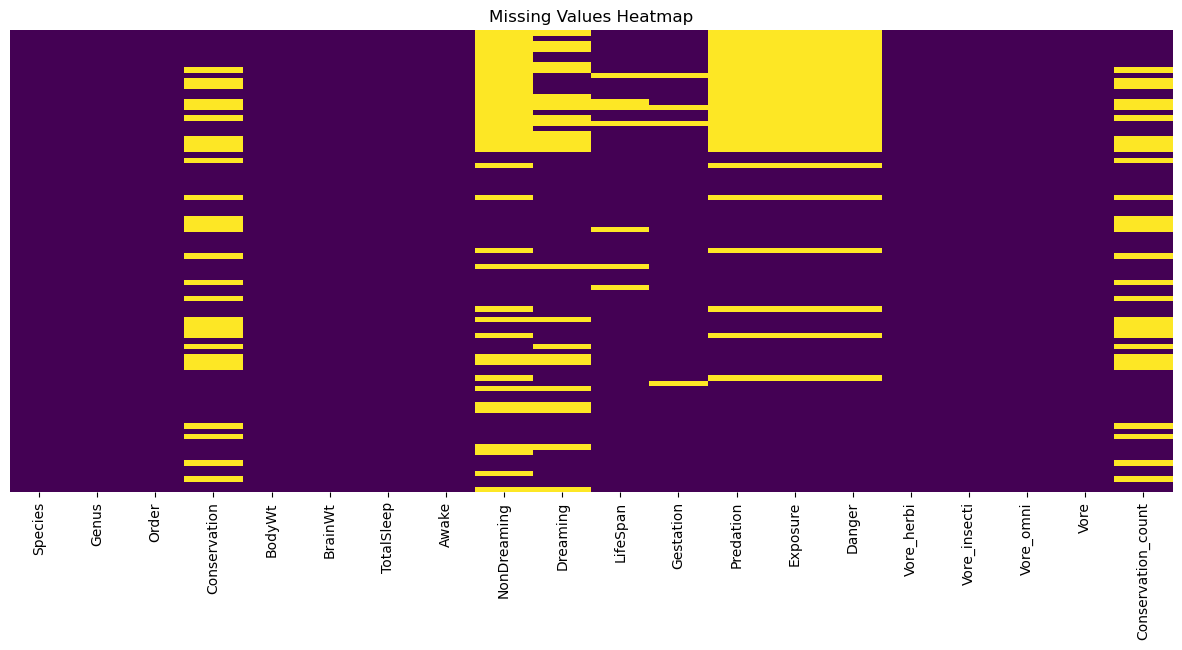

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting missing values
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions<br>
        d. Median imputation<br>
        e. Regression imputation
    </li>
</ol>

### Correlation in Data Analysis

Correlation measures the **strength and direction** of the linear relationship between two variables. It quantifies how closely the data points in one variable move in relation to the data points in another variable. The correlation coefficient ranges from **-1 to 1**:

- **Positive correlation (0 to 1)**: When one variable increases, the other tends to increase as well. A value close to 1 indicates a strong positive relationship.
- **Negative correlation (-1 to 0)**: When one variable increases, the other tends to decrease. A value close to -1 indicates a strong negative relationship.
- **No correlation (around 0)**: The variables are not linearly related.

Correlation does **not** imply causation. Even if two variables are highly correlated, it doesn't mean one causes the ot#her.

### Higher Correlation

When we say "higher correlation," we mean a **stronger linear relationship** between the variables:

- If the correlation coefficient is **0.8**, it indicates a **strong positive correlation**.
- If the correlation coefficient is **-0.6**, it indicates a **moderate negative correlation**.
- If the correlation coefficient is **0.1**, it suggests a **weak positive correlation** (closer to no #correlation).

### Interpreting Correlation

- **Positive correlation**: As one variable increases, the other tends to increase. For instance, height and weight often have a positive correlation.
- **Negative correlation**: As one variable increases, the other tends to decrease. For example, temperature and ice cream sales may have a negative correlation.
- **No correlation**: When changes in one variable do not consistently predict changes in the other.

In [31]:
# Filtering only numerical columns for correlation matrix
num_df = df.select_dtypes(include=["float", "int"])
num_df = num_df.drop(["Vore_herbi","Vore_insecti","Vore_omni"], axis=1)

correlation_matrix = num_df.iloc[:].corr()
# Display the correlation matrix
print(correlation_matrix)


                      BodyWt   BrainWt  TotalSleep     Awake  NonDreaming  \
BodyWt              1.000000  0.925683   -0.310147  0.310119    -0.390767   
BrainWt             0.925683  1.000000   -0.319661  0.319476    -0.376848   
TotalSleep         -0.310147 -0.319661    1.000000 -0.999999     0.915648   
Awake               0.310119  0.319476   -0.999999  1.000000    -0.915648   
NonDreaming        -0.390767 -0.376848    0.915648 -0.915648     1.000000   
Dreaming           -0.166742 -0.093491    0.749131 -0.749136     0.517966   
LifeSpan            0.300024  0.436459   -0.451324  0.451469    -0.393831   
Gestation           0.621238  0.651278   -0.658166  0.658417    -0.556366   
Predation           0.070922  0.027343   -0.408713  0.408713    -0.332149   
Exposure            0.370613  0.383869   -0.677876  0.677876    -0.550287   
Danger              0.150341  0.143061   -0.587729  0.587729    -0.495562   
Conservation_count -0.264532 -0.255197    0.279898 -0.280196     0.193297   

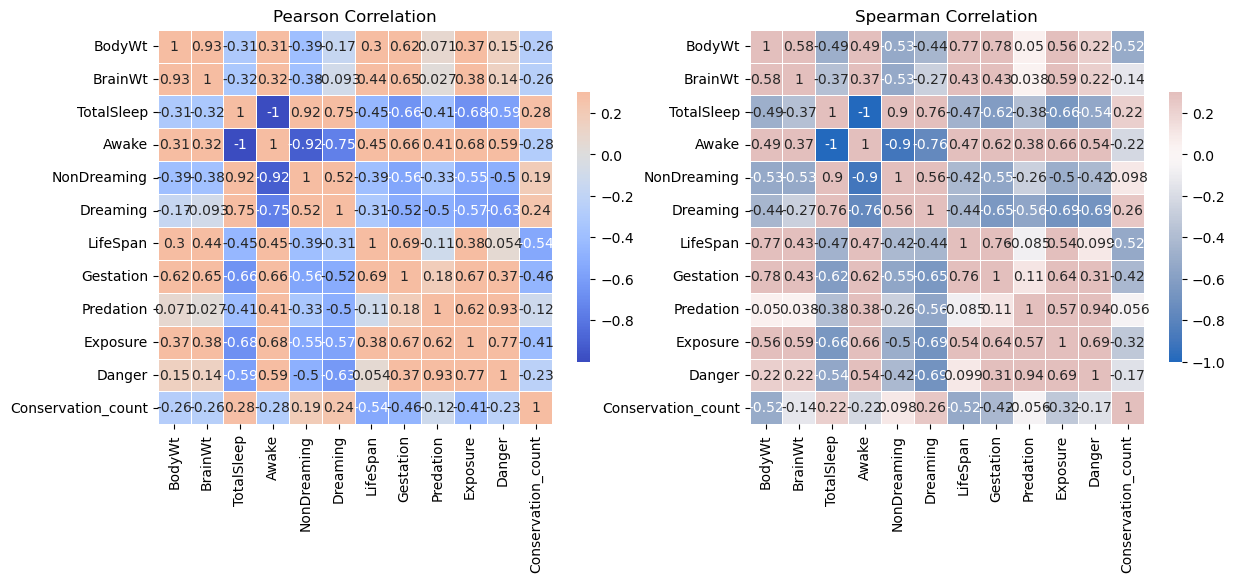

In [32]:
# Create subplots with two columns to display two heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Calculate and draw the Pearson correlation heatmap
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm',
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[0])
axes[0].set_title("Pearson Correlation")

# Calculate and draw the Spearman correlation heatmap
sns.heatmap(num_df.corr(method='spearman'), annot=True, cmap='vlag',
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=axes[1])
axes[1].set_title("Spearman Correlation")

# Display the plot
plt.show()


In [33]:
# Create the heatmap
fig2 = px.imshow(correlation_matrix, labels=dict(x="Column Index", y="Column Index"))

# Customize the heatmap (optional)
fig2.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Column Index",
    yaxis_title="Column Index",
    coloraxis_colorbar=dict(title="Correlation"),
    width=900,  # Adjust width as needed
    height=700  # Adjust height as needed
)

# Show the plot
fig2.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<div style="background-color:#ADD8E6; padding: 18px;">
<b>Distribution Analysis of Numeric Variables</b>
</div>

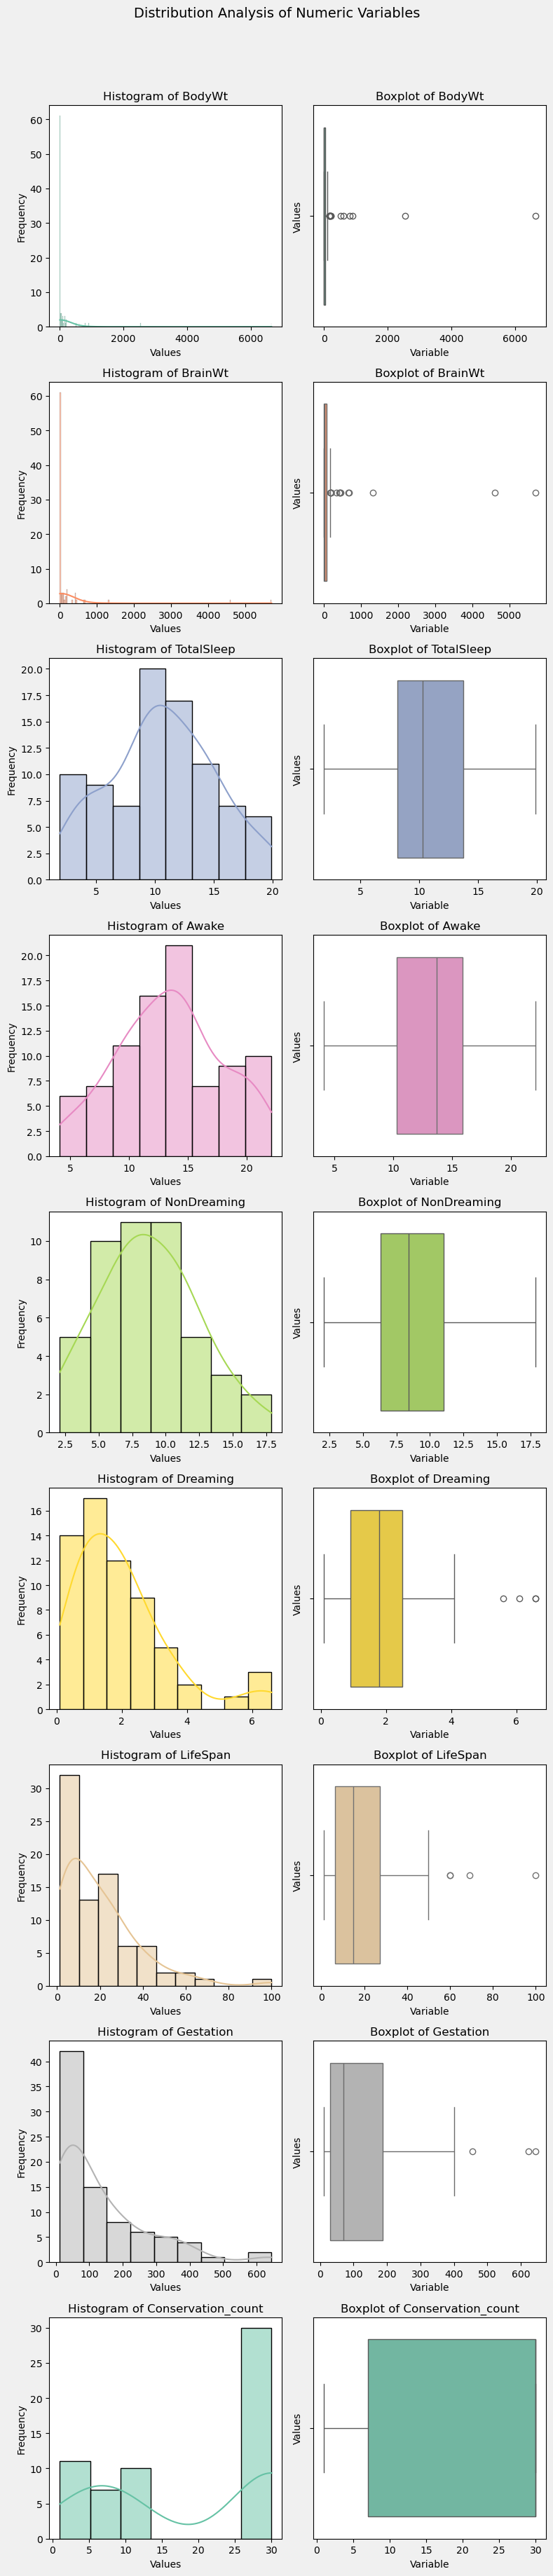

In [34]:
# List of numeric columns to plot
numeric_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in ['Predation', 'Exposure', 'Danger']]

# Define a color palette for the plots
color_palette = sns.color_palette("Set2", len(numeric_cols))

# Create a figure for the subplots with a smaller size and non-white background
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(8, 4 * len(numeric_cols)))  # Adjust figsize
fig.set_facecolor('#f0f0f0')  # Set background color to light gray

for i, col in enumerate(numeric_cols):
    # Plot the histogram on the left (first column)
    sns.histplot(data=df, x=col, bins="auto", kde=True, ax=axes[i, 0], color=color_palette[i])
    axes[i, 0].set_title(f"Histogram of {col}")
    axes[i, 0].set_xlabel("Values")
    axes[i, 0].set_ylabel("Frequency")
    
    # Plot the boxplot on the right (second column)
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color=color_palette[i])
    axes[i, 1].set_title(f"Boxplot of {col}")
    axes[i, 1].set_xlabel("Variable")
    axes[i, 1].set_ylabel("Values")

# Add a title to the entire figure
plt.suptitle("Distribution Analysis of Numeric Variables", fontsize=14, y=1.02)  # Adjust fontsize

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

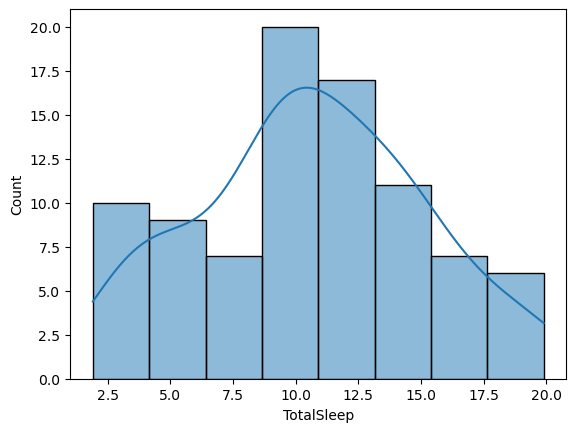

In [35]:
# Histograms for continuous variables
sns.histplot(df['TotalSleep'], kde=True)
plt.show()



The effect of applying a logarithmic transformation to features in machine learning models depends on the distribution and characteristics of the data. Logarithmic transformations are often used to handle skewed data distributions, reduce the impact of outliers, and improve the interpretability of relationships.

c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



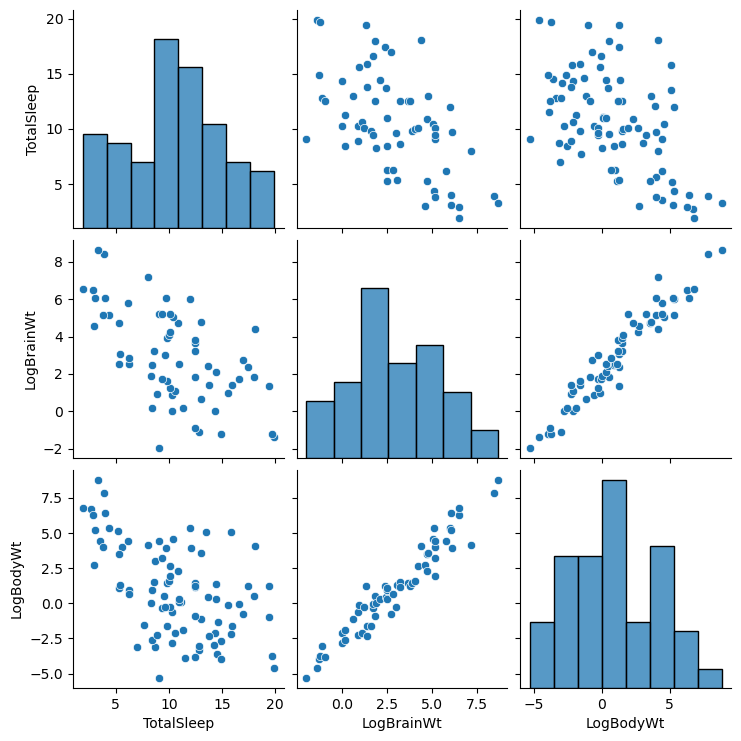

In [36]:
# Apply logarithmic transformation only to non-zero and positive values
df['LogBrainWt'] = np.where(df['BrainWt'] > 0, np.log(df['BrainWt']), np.nan)
df['LogBodyWt'] = np.where(df['BodyWt'] > 0, np.log(df['BodyWt']), np.nan)

# Plot the pairplot
sns.pairplot(df, vars=["TotalSleep", "LogBrainWt", "LogBodyWt"])


Lets creat a new Column using Feature engineering 

<Axes: xlabel='BrainBodyRatio', ylabel='TotalSleep'>

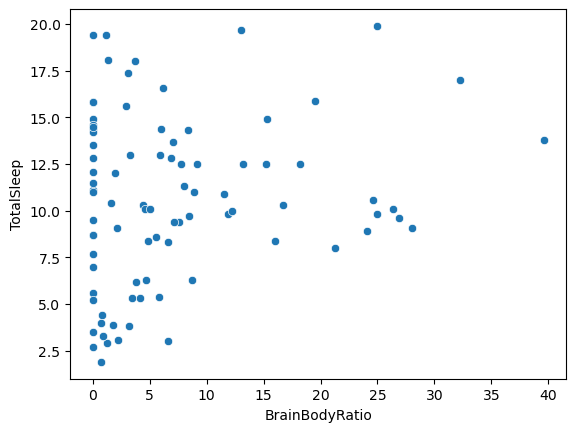

In [107]:
df["BrainBodyRatio"] = df["BrainWt"] / df["BodyWt"]
sns.scatterplot(data=df, x="BrainBodyRatio", y="TotalSleep")

<div style="background-color:#b22222; padding: 10px;">

     Some useful functions to check for correlations and normality, that we will often need throughout this notebook
    
     Next we will define a function to test not graphically but analyticaly the normality of our features
</div>

In [38]:
# define a correlation function that returns the corr a target column has with other columns if corr > t (threshold)
# use both pearson and spearman because some features are not normally distributed, non linear relationship etc.

def corr_func(target: str, t):
    spear_corr = {}
    pears_corr = {}
    for col in cols:
        if df[col].dtype in ["float64", "int64"] and col != target:
            # Pairwise deletion to include only rows where there is no missing values at all in either of the two features
            valid_rows = df[[col, target]].dropna()

            if len(valid_rows) > 0:  # Check if there are valid rows for correlation (since I know the dataset, it's useless here but i still include it)
                correlation, p_value = spearmanr(valid_rows[col], valid_rows[target])
                correlation2 = valid_rows[col].corr(valid_rows[target])
                if abs(correlation) >= t:
                    spear_corr[col] = round(correlation, 2)
                elif abs(correlation2) >= t:
                    pears_corr[col] = round(correlation2, 2)
    print(f"Correlation for {target} : \n\n Spearman correlation is: {spear_corr}", "\n\n", f"Pearson correlation is: {pears_corr}")

    return


In [39]:
# Function check for normality 

from scipy.stats import kstest, anderson, norm

def normal_test(feature, alpha):
    result = {}

    # Kstest
    ks_stat, ks_pvalue = kstest(feature, 'norm')
    ks_normal = ks_pvalue > alpha
    result['Kolmogorov-Smirnov'] = {'Statistic': ks_stat, 'p_value': ks_pvalue, 'Normal': ks_normal}

    ''''#Anderson
    ad_statistic, ad_critical_values, ad_significance_level = anderson(feature, dist="norm")
    ad_normal = ad_statistic < ad_critical_values[ad_significance_level == alpha][0]'''
    ## ANDERSON TEST seems to fail unexpectedly, I try to make it work, and to not block the code if it fails


    # Check if the sample size is sufficient for Anderson-Darling
    if len(feature) >= 3:
        try:
            ad_statistic, ad_critical_values, ad_significance_level = anderson(feature, dist="norm")
            ad_normal = ad_statistic < ad_critical_values[ad_significance_level == alpha][0]
            result['Anderson-Darling'] = {'Statistic': ad_statistic, 'Critical Values': ad_critical_values, 'Significance Level': ad_significance_level, 'Normal': ad_normal}
        except (ValueError, IndexError):
            result['Anderson-Darling'] = {'Statistic': None, 'Critical Values': None, 'Significance Level': None, 'Normal': False}
            result['Error'] = 'Anderson-Darling test failed'
    else:
        result['Error'] = 'Insufficient data points for testing'


    return result

<div style="background-color:#b22222; padding: 10px;">
    
    To assess whether a feature is normal or not, we can run some statistical test, extract their p-value and compare it to the p value cutoff. (we can   set it 0.05, higher or lower).
</div>

In [40]:
label = df["TotalSleep"].dropna().astype(float)
result = normal_test(label, alpha=0.05)
print(result)

{'Kolmogorov-Smirnov': {'Statistic': 0.9850387733233962, 'p_value': 3.335620642889021e-159, 'Normal': False}, 'Anderson-Darling': {'Statistic': None, 'Critical Values': None, 'Significance Level': None, 'Normal': False}, 'Error': 'Anderson-Darling test failed'}


<div style="background-color:#ADD8E6; padding: 18px;">
<b>Danger,Exposure and Predation</b>
</div>

In [41]:
df.describe()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Vore_herbi,Vore_insecti,Vore_omni,Conservation_count,LogBrainWt,LogBodyWt,BrainBodyRatio
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,80.000000,83.000000,58.000000,58.000000,58.000000,87.000000,87.000000,87.000000,58.000000,64.000000,87.000000,87.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,19.620000,134.577108,2.844828,2.362069,2.586207,0.425287,0.091954,0.229885,18.724138,2.956216,0.938204,7.286394
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,17.896074,138.128453,1.496214,1.575005,1.426989,0.497253,0.290636,0.423198,11.954289,2.472370,3.229555,8.865756
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,1.300000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.966113,-5.298317,0.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.375000,31.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.333923,-1.597092,0.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.000000,70.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,30.000000,2.633284,0.693147,4.363636
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,27.250000,187.750000,4.000000,4.000000,4.000000,1.000000,0.000000,0.000000,30.000000,4.851549,3.752333,9.035181
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,30.000000,8.650325,8.802973,39.603960


<div style="background-color:#b22222; padding: 10px;">
<b>Notice</b>: In our project, we explored various methods for cleaning our data due to its messy nature. Consequently, we opted to employ two distinct approaches for data cleaning. This resulted in the creation of two datasets, each processed using a different method. We will evaluate both datasets during the modeling phase, ultimately selecting the most effective approach.

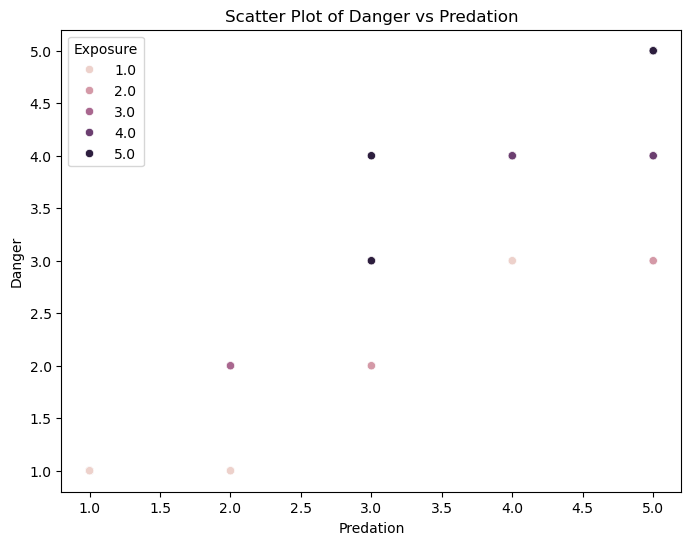

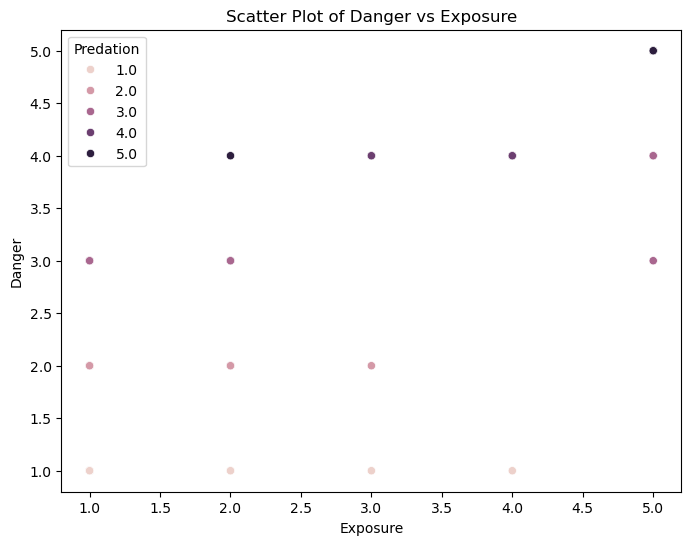

In [42]:
import seaborn as sns
# Scatter plot of Danger vs Predation Plus
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Predation', y='Danger', hue='Exposure')
plt.title('Scatter Plot of Danger vs Predation')
plt.xlabel('Predation')
plt.ylabel('Danger')
plt.legend(title='Exposure')
plt.show()

# Scatter plot of Danger vs Exposure
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Exposure', y='Danger', hue='Predation')
plt.title('Scatter Plot of Danger vs Exposure')
plt.xlabel('Exposure')
plt.ylabel('Danger')
plt.legend(title='Predation')
plt.show()

As we can see , danger and Predation have a good correlation and linear relationship so we can use that for filling the missing data

In [43]:
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['Danger'],
    y=df['Predation'],
    z=df['Exposure'],
    mode='markers',
    marker=dict(
        size=6,
        color=df['Exposure'],  # Color by Exposure
        colorscale='Viridis',  # Choose a colormap
        opacity=0.8
    )
)])

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='Danger',
        yaxis_title='Predation',
        zaxis_title='Exposure'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Calculate correlation between features and target variable
correlation_danger = df['Danger'].corr(df['Exposure'])
correlation_predation = df['Predation'].corr(df['Exposure'])

print("Correlation between Danger and Exposure:", correlation_danger)
print("Correlation between Predation and Exposure:", correlation_predation)


Correlation between Danger and Exposure: 0.7703607822462146
Correlation between Predation and Exposure: 0.6198385703531534


In [108]:
df["Predation"] = df["Predation"].fillna(df.groupby("Order")["Predation"].transform("mean").round())
df["Exposure"] = df["Exposure"].fillna(df.groupby("Order")["Exposure"].transform("mean").round())
df["Danger"] = df["Danger"].fillna(df.groupby("Order")["Danger"].transform("mean").round())

##### It seems grouping by vore, gives some clues on the these features as well, so we can see that there is a low std dev of pred, exp, dang, grouped by vore
Notes: Actually grouping by vore was doable at first, but it's a choice. Order and Vore are very much linked, they got the same vore for the same order (almost), sometimes herbi/omni but herbi/omni have almost the same mean. So it's fine and on parallel grouping by order can contain real information other than vore for predation exposure

In [109]:
df["Predation"] = df["Predation"].fillna(df.groupby("Vore")["Predation"].transform("mean").round())
df["Exposure"] = df["Exposure"].fillna(df.groupby("Vore")["Exposure"].transform("mean").round())
df["Danger"] = df["Danger"].fillna(df.groupby("Vore")["Danger"].transform("mean").round())

<div style="background-color:#ADD8E6; padding: 18px;">
<b>BrainWt Column</b>
</div>

<span style="color:green;font-weight:700;font-size:15px">  
Deal with wrong data
</span>

<b>Another issue to be addressed in our dataset concerns "BrainWt" feature that displays some 0 values which should be biologically incorrect. Those will be treated using regression imputation.</b>

#### Here we will correct the 0 values found in the BrainWt feature that should not be 0

In [110]:
df['BrainWt'] = df['BrainWt'].replace(0, np.nan)

In [ ]:
import plotly.io as pio
pio.renderers.default = "iframe"
# Assuming 'df'
selected_columns = df.columns[4:6]  # Select columns from the 6th column onwards

fig = px.histogram(data_frame=df, x=selected_columns)

In [ ]:
iplot(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<span style="color:red;font-size: 15px; font-style: italic; font-weight: bold;">--> We seemed to have outliers in our brainwt feature as some species exceed 5000g, however this is consistent with biological data for these species as it can be verified on biological sources such as Encyclopedia of Life.</span>

<div style="background-color:#ADD8E6; padding: 10px;">
With a strong correlation between 'BodyWt' and 'BrainWt' and a considerable number of missing values in the 'BrainWt' column, you can impute the missing values using a method that takes into account the relationship between the two variables. Since there is a strong correlation, you can use linear regression to predict the missing 'BrainWt' values based on the corresponding 'BodyWt' values.
</div>

In [111]:
df_model = df[['BodyWt','BrainWt']].dropna()

In [ ]:
spearman_corr, p_value = spearmanr(df_model["BodyWt"],df_model["BrainWt"])
print(spearman_corr)
print(p_value)

0.95426707170921
3.245340518275321e-34


##### We train a linear regression model to fill out the 0 values fo brain weight based on body weight

In [112]:
feature = df_model["BodyWt"].values.reshape(-1,1)
target = df_model["BrainWt"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.1, random_state = 11)

In [113]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [114]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

7410.142884760871 0.3269973287388068


##### We do the regression imputation

In [115]:
df_model_null = df[df["BrainWt"].isnull()]
df_model_complete = df[-df["BrainWt"].isnull()]

model = LinearRegression()

# Train the model using the complete data
X = df_model_complete["BodyWt"].values.reshape(-1, 1)
y = df_model_complete["BrainWt"].values
model.fit(X, y)

# Use the trained model to predict "BrainWt" for the missing values
X_predict = df_model_null["BodyWt"].values.reshape(-1, 1)
y_pred = model.predict(X_predict)
y_pred = np.maximum(y_pred, 0)

#rounding
y_pred = np.round(y_pred,2)
# Replace the missing "BrainWt" values with the predicted values
df.loc[df["BrainWt"].isnull(), "BrainWt"] = y_pred

In [116]:
# Display the DataFrame with both columns side by side
print(df[['BodyWt', 'BrainWt']])

      BodyWt  BrainWt
0     50.000   126.92
1     20.490    98.55
2    161.499   234.11
3    162.564   235.14
4     86.000   161.53
..       ...      ...
82   521.000   655.00
83   899.995   680.00
84    62.000  1320.00
85  2547.000  4603.00
86  6654.000  5712.00

[87 rows x 2 columns]


In [117]:
# Check the condition that BodyWt should always be greater than BrainWt
condition_violations = df[df['BodyWt']*1000 <= df['BrainWt']]
if not condition_violations.empty:
    print("Warning: There are", len(condition_violations), "rows where BodyWt is not greater than BrainWt.")
    print("Here are the rows:")
    print(condition_violations)
else:
    print("No violations found.")


Here are the rows:
                       Species       Genus     Order Conservation  BodyWt  \
13                Vesper mouse     Calomys  Rodentia          NaN   0.045   
14   Western american chipmunk    Eutamias  Rodentia          NaN   0.071   
15            Mongolian gerbil    Meriones  Rodentia           lc   0.053   
16                       Vole     Microtus  Rodentia          NaN   0.035   
19  Northern grasshopper mouse   Onychomys  Rodentia           lc   0.028   
20                  Deer mouse  Peromyscus  Rodentia          NaN   0.021   
21       African striped mouse   Rhabdomys  Rodentia          NaN   0.044   

    BrainWt  TotalSleep  Awake  NonDreaming  Dreaming  LifeSpan  Gestation  \
13    78.89         7.0   17.0          NaN       NaN       NaN       21.8   
14    78.92        14.9    9.1          NaN       NaN       NaN        NaN   
15    78.90        14.2    9.8          NaN       1.9       4.0       26.0   
16    78.88        12.8   11.2          NaN       Na

<div style="background-color:#32cd32 ; padding: 10px;">
In a article form wikipedia we can found this image and see that the mouse brain to body Ratio is about 1:40
    
[Link Brain–body mass ratio](https://en.wikipedia.org/wiki/Brain%E2%80%93body_mass_ratio)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Brain-body_mass_ratio_for_some_animals_diagram.svg/1280px-Brain-body_mass_ratio_for_some_animals_diagram.svg.png" alt="Nature" width="500" height="450">
</div>


In [118]:
# Calculate the ratio of BrainWt to BodyWt
ratio = 1 / 40
# Replace incorrect values with the ratio of 1:40 with respect to 'BodyWt'
df.loc[condition_violations.index, 'BrainWt'] = df.loc[condition_violations.index, 'BodyWt'] * ratio

In [119]:
condition_violations = df[df['BodyWt']*1000 <= df['BrainWt']]
if not condition_violations.empty:
    print("Warning: There are", len(condition_violations), "rows where BodyWt is not greater than BrainWt.")
    print("Here are the rows:")
    print(condition_violations)
else:
    print("No violations found.")

No violations found.


In [120]:
df.isna().sum()

Species            0
Genus              0
Order              0
Conservation      29
BodyWt             0
BrainWt            0
TotalSleep         0
Awake              0
NonDreaming       40
Dreaming          24
LifeSpan           7
Gestation          4
Predation          0
Exposure           0
Danger             0
Vore_herbi         0
Vore_insecti       0
Vore_omni          0
Vore               0
BrainBodyRatio     0
dtype: int64

<div style="background-color:#ADD8E6; padding: 18px;">
<b>Next go for deal with LifeSpan & Gestation Columns</b>
</div>

##### We going to fill some LifeSpan rows where gestation is available using regression imputation again

In [121]:
corr_func("LifeSpan",0)

Correlation for LifeSpan : 

 Spearman correlation is: {'BodyWt': 0.77, 'BrainWt': 0.83, 'TotalSleep': -0.47, 'Awake': 0.47, 'NonDreaming': -0.42, 'Dreaming': -0.44, 'Gestation': 0.76, 'Predation': -0.26, 'Exposure': 0.5, 'Danger': -0.09} 

 Pearson correlation is: {}


In [122]:
# We going to fill some LifeSpan rows where gestation is available
df_model = df.dropna()
df_model_features = df_model[["BrainWt", "TotalSleep","Gestation"]]
df_model_target = df_model[["LifeSpan"]]

X_train, X_test, y_train, y_test = train_test_split(df_model_features, df_model_target, test_size = 0.1, random_state = 11)
y_train = y_train.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

df_model_features_test = df[df["LifeSpan"].isnull() & -df["Gestation"].isnull()]
X_test = df_model_features_test[["BrainWt","TotalSleep","Gestation"]]

y_pred = model.predict(X_test)
df.loc[df["LifeSpan"].isnull() & -df["Gestation"].isnull(), "LifeSpan"] = y_pred
df["LifeSpan"] = np.round(df["LifeSpan"],1)

#### We going to FULLY fill out Gestation missing values through regression imputation

In [123]:
corr_func("Gestation",0.5)

Correlation for Gestation : 

 Spearman correlation is: {'BodyWt': 0.78, 'BrainWt': 0.82, 'TotalSleep': -0.62, 'Awake': 0.62, 'NonDreaming': -0.55, 'Dreaming': -0.65, 'LifeSpan': 0.76, 'Exposure': 0.57} 

 Pearson correlation is: {}


In [124]:
# We going to FULLY fill out Gestation missing values through regression imputation
df_model = df.dropna()
df_model_features = df_model[["BodyWt","BrainWt", "TotalSleep"]]
df_model_target = df_model[["Gestation"]]

X_train, X_test, y_train, y_test = train_test_split(df_model_features, df_model_target, test_size = 0.1, random_state = 11)
y_train = y_train.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

df_model_features_test = df[df["Gestation"].isnull()]
X_test = df_model_features_test[["BodyWt","BrainWt", "TotalSleep"]]

y_pred = model.predict(X_test)
gestation_minimum = df["Gestation"].min()
y_pred = np.round(np.maximum(y_pred, gestation_minimum),1)
df.loc[df["Gestation"].isnull(), "Gestation"] = y_pred
df["Gestation"] = np.round(df["Gestation"],1)

#### We going to fill the remaining LifeSpan rows now that all gestation is available

In [125]:
# We going to fill the remaining LifeSpan rows now that all gestation is available
df_model = df.dropna()
df_model_features = df_model[["BrainWt", "TotalSleep","Gestation"]]
df_model_target = df_model[["LifeSpan"]]

X_train, X_test, y_train, y_test = train_test_split(df_model_features, df_model_target, test_size = 0.1, random_state = 11)
y_train = y_train.values.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

df_model_features_test = df[df["LifeSpan"].isnull() & -df["Gestation"].isnull()]
X_test = df_model_features_test[["BrainWt","TotalSleep","Gestation"]]

y_pred = model.predict(X_test)
df.loc[df["LifeSpan"].isnull() & -df["Gestation"].isnull(), "LifeSpan"] = y_pred
df["LifeSpan"] = np.round(df["LifeSpan"],1)

<div style="background-color:#ADD8E6; padding: 18px;">
<b>Next go for deal with NonDreaming & Dreaming Column</b>
</div>

In [126]:
# we quickly test what Dreaming correlates with
corr_func("Dreaming", 0.5)

Correlation for Dreaming : 

 Spearman correlation is: {'TotalSleep': 0.76, 'Awake': -0.76, 'NonDreaming': 0.56, 'Gestation': -0.69, 'Exposure': -0.63, 'Danger': -0.53} 

 Pearson correlation is: {}


##### Correlation for Dreaming : 
 ##### Spearman correlation is: {'TotalSleep': 0.76, 'Awake': -0.76, 'NonDreaming': 0.56, 'Gestation': -0.69, 'Exposure': -0.63, 'Danger': -0.53} 
 ##### So we will consider TotalSleep, Gestation and Danger

In [127]:
df.isna().sum()

Species            0
Genus              0
Order              0
Conservation      29
BodyWt             0
BrainWt            0
TotalSleep         0
Awake              0
NonDreaming       40
Dreaming          24
LifeSpan           0
Gestation          0
Predation          0
Exposure           0
Danger             0
Vore_herbi         0
Vore_insecti       0
Vore_omni          0
Vore               0
BrainBodyRatio     0
dtype: int64

<div style="background-color:#ADD8E6; padding: 18px;">
<b>What About The Dreaming Column? </b>
    
    The Dreaming Column it is not just a simple column , is our Y or target to prediction , we can not drop or fill with mean or median! we must find the best Algorithm for predicting Dreaming using the other columns and predict the missing values ! 
</div>

In [128]:
df_model = df[-df["Dreaming"].isnull()]
df_model_null_dreaming = df[df["Dreaming"].isnull()]


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target
features = df_model[["TotalSleep","Exposure"]]
target = df_model[["Dreaming"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse =", mse, "r2 =", r2)


mse = 0.4954809065909126 r2 = 0.7196643012592425


In [129]:
# trying to find the heaviest predictor from the features above

# Assuming you have already trained your linear regression model as shown in your code
# model = LinearRegression()
# model.fit(X_train, y_train)

# Access the coefficients (weights) of the features
coefficients = model.coef_

# Create a dictionary to associate feature names with their coefficients
feature_coefficients = dict(zip(features.columns, coefficients[0]))

# Find the heaviest predictor (feature with the largest absolute coefficient)
heaviest_predictor = max(feature_coefficients, key=lambda k: abs(feature_coefficients[k]))

# Print the coefficients of all features and the heaviest predictor
print("Feature Coefficients:")
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient:.4f}")

print("\nThe Heaviest Predictor is:", heaviest_predictor)


Feature Coefficients:
TotalSleep: 0.2095
Exposure: -0.1072

The Heaviest Predictor is: TotalSleep


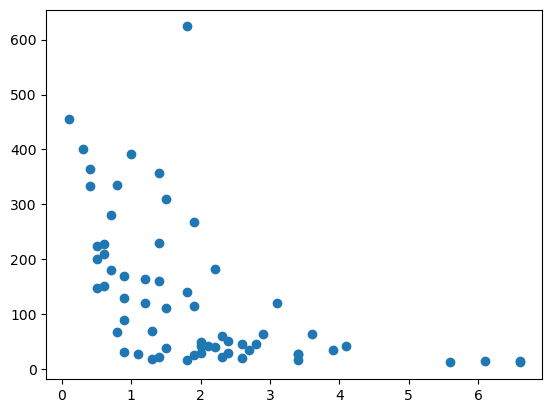

In [130]:
plt.scatter(df["Dreaming"], df["Gestation"])

In [131]:
corr_func("Dreaming",0.5)
kendal_corr = df["Dreaming"].corr(df["Gestation"], method="kendall")
print("\n\n Kendall correlation coefficient is ", kendal_corr)

Correlation for Dreaming : 

 Spearman correlation is: {'TotalSleep': 0.76, 'Awake': -0.76, 'NonDreaming': 0.56, 'Gestation': -0.69, 'Exposure': -0.63, 'Danger': -0.53} 

 Pearson correlation is: {}


 Kendall correlation coefficient is  -0.5033927081768647


##### we don't understand why but the model doesn't put any weight on Gestation despite the good negative correlation between both ? So we remove gestation in the model since it has no influence. We can dig further to understand it maybe comparing with xlstat , minitab or other...

##### We tested a bunch of models and features to assess which is preferable for imputing values in Dreaming. It seems Linear regression offers the best score as far as the test was conducted. We trained it previoudly, now we use it to do the imputation.

In [132]:
df_dreaming_null = df[df['Dreaming'].isnull()]

X_test = df_dreaming_null[["TotalSleep","Exposure"]]


# Make predictions on the test set
y_imputation = model.predict(X_test)


df.loc[df["Dreaming"].isnull(),"Dreaming"] = y_imputation


In [133]:
df["Dreaming"].isna().sum()

0

In [134]:
df['LogBrainWt'] = np.log(df['BrainWt'])
df['LogBodyWt'] = np.log(df["BodyWt"])
df["BrainBodyRatio"] = df["BrainWt"] / df["BodyWt"]

In [135]:
df.describe()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Vore_herbi,Vore_insecti,Vore_omni,BrainBodyRatio,LogBrainWt,LogBodyWt
count,87.000000,87.000000,87.000000,87.000000,47.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,161.384310,227.656177,10.608046,13.393103,8.736170,2.020108,18.691954,129.763218,2.781609,2.252874,2.436782,0.425287,0.091954,0.229885,28.263118,2.510001,0.938204
std,768.846727,792.575067,4.465793,4.467481,3.679522,1.333916,17.443485,136.716006,1.442102,1.322598,1.291305,0.497253,0.290636,0.423198,92.020911,3.600949,3.229555
min,0.005000,0.000525,1.900000,4.100000,2.100000,0.100000,1.300000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.025000,-7.552112,-5.298317
25%,0.202500,3.250000,8.150000,10.250000,6.300000,1.002866,6.500000,30.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.024155,1.175688,-1.597092
50%,2.000000,25.000000,10.300000,13.700000,8.400000,1.900000,13.000000,63.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,6.000000,3.218876,0.693147
75%,43.165000,128.450000,13.750000,15.850000,11.000000,2.630564,26.500000,181.250000,4.000000,3.000000,3.000000,1.000000,0.000000,0.000000,15.631579,4.855469,3.752333
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,705.000000,8.650325,8.802973


#### NonDreaming cleaning

In [136]:
corr_func("NonDreaming",0.000001)

Correlation for NonDreaming : 

 Spearman correlation is: {'BodyWt': -0.53, 'BrainWt': -0.53, 'TotalSleep': 0.9, 'Awake': -0.9, 'Dreaming': 0.55, 'LifeSpan': -0.4, 'Gestation': -0.56, 'Predation': -0.26, 'Exposure': -0.5, 'Danger': -0.42} 

 Pearson correlation is: {}


<div style="background-color:#e2062c; padding: 10px;">
<b>BUT : 
Filling missing values based on a feature's correlation with the desired output (target variable) can introduce a risk of overfitting, especially if the correlation is high. Overfitting occurs when a model learns to capture noise or random fluctuations in the training data rather than the underlying relationships
</b>
</div.

In [137]:
df_ndreaming_null = df[df["NonDreaming"].isnull()]
df_ndreaming_complete = df[-df["NonDreaming"].isnull()]

feature = df_ndreaming_complete[["TotalSleep","BrainWt","BodyWt","Dreaming","Gestation"]]
target = df_ndreaming_complete[["NonDreaming"]]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=3)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse =", mse, "r2 =", r2)



mse = 0.3742039997939509 r2 = 0.9659470920843806


In [138]:
# Now we will to the regression imputation

x = df_ndreaming_null[["TotalSleep","BrainWt","BodyWt","Dreaming","Gestation"]]

y_imputation = model.predict(x)

df.loc[df["NonDreaming"].isnull(),"NonDreaming"] = y_imputation

In [139]:
df["NonDreaming"].isna().sum()

0

In [140]:
df["Dreaming"] = df["Dreaming"].round(2)
df["NonDreaming"] = df["NonDreaming"].round(2)

<h2 id="data_standardization">Data Standardization / Normalization / Transformation</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

##### The data are unevenly distributed, showing highly skewed distribution. Standardization / Normalization doesn't account for the distribution shape but mainly for the scale. Some model assume normality. To address this issue we can use, Boxcox or Johnson's fit. We use Johnson SB fit transformation as our data are skewed to the right.

In [141]:
from scipy.stats import johnsonsb
import numpy as np


col_std = ['BodyWt', 'BrainWt', 'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan', 'Gestation']

for col in col_std:
    # Fit Johnson SB distribution to the data
    params = johnsonsb.fit(df[col])
    
    # Transform the data using the Johnson SB distribution
    df[col] = johnsonsb(*params).cdf(df[col])

# Now your data in the specified columns should be transformed using the Johnson SB distribution


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>


In [177]:
# I will standardize rather than normalize
col_std = ['BodyWt', 'BrainWt', 'TotalSleep', 'NonDreaming', 'Dreaming', 'LifeSpan', 'Gestation']

# scaler = StandardScaler()
scaler = MinMaxScaler()

for col in col_std:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

##### DF should contains only scaled and normalized features now, we will check.

In [178]:
scaled = {}
for col in col_std:
    mean = df[col].mean()
    std = df[col].std()
    scaled[col] = [mean,std]


In [179]:
scaled

{'BodyWt': [0.5000649247352432, 0.2911566591401097],
 'BrainWt': [0.5650247878907496, 0.2682905277948122],
 'TotalSleep': [0.503948177423086, 0.28394702932352944],
 'NonDreaming': [0.4977034696438304, 0.29504112768712687],
 'Dreaming': [0.5028411564537322, 0.29192728264821766],
 'LifeSpan': [0.502164515550574, 0.29469393949771133],
 'Gestation': [0.49873650815584214, 0.2928896550272987]}

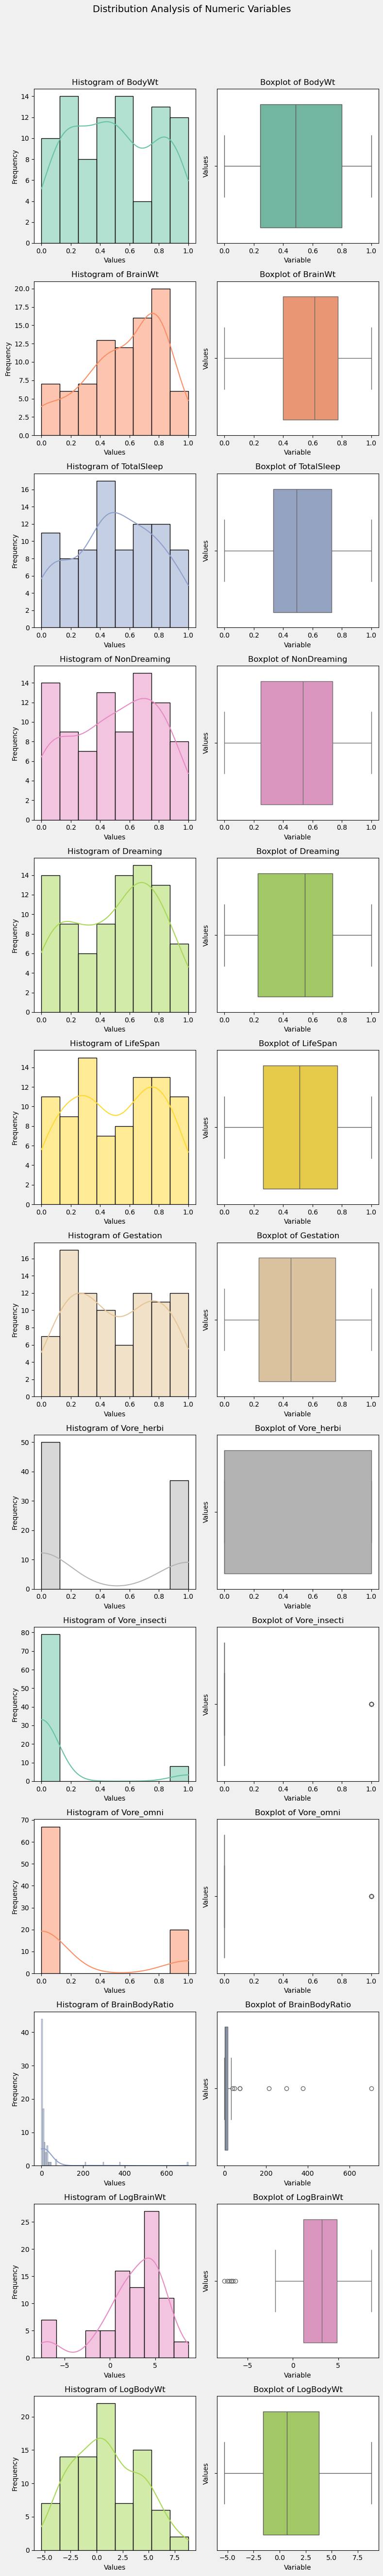

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot
numeric_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in ['Predation', 'Exposure', 'Danger']]

# Define a color palette for the plots
color_palette = sns.color_palette("Set2", len(numeric_cols))

# Create a figure for the subplots with a smaller size and non-white background
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(8, 4 * len(numeric_cols)))  # Adjust figsize
fig.set_facecolor('#f0f0f0')  # Set background color to light gray

for i, col in enumerate(numeric_cols):
    # Plot the histogram on the left (first column)
    sns.histplot(data=df, x=col, bins="auto", kde=True, ax=axes[i, 0], color=color_palette[i])
    axes[i, 0].set_title(f"Histogram of {col}")
    axes[i, 0].set_xlabel("Values")
    axes[i, 0].set_ylabel("Frequency")
    
    # Plot the boxplot on the right (second column)
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color=color_palette[i])
    axes[i, 1].set_title(f"Boxplot of {col}")
    axes[i, 1].set_xlabel("Variable")
    axes[i, 1].set_ylabel("Values")

# Add a title to the entire figure
plt.suptitle("Distribution Analysis of Numeric Variables", fontsize=14, y=1.02)  # Adjust fontsize

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Seems like it's decently normalized.

<div style="background-color:#b22222; padding: 10px;">
<b>We should as mentioned in instruction of project, drop the Awake column , its redundant!</b>
</div>

In [142]:
# Drop the 'awake' column
df = df.drop(columns=['Awake'])

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:
<div style="background-color:#b22222; padding: 10px;">
<b>Drop the whole column:</b>

<ul>
    <li><b>"Conservation": 29 missing data,no direct relation to our desired outputs, simply delete the whole column</b>
        <ul>
            <li>Reason: The conservation status of mammals, as categorized by the International Union for Conservation of Nature (IUCN), refers to their risk of extinction. It classifies species into various levels, such as “Least Concern,” “Endangered,” or “Critically Endangered” based on factors like population size, habitat loss, and threats. In summary, there isn’t direct evidence linking conservation status to mammal sleep</li>
        </ul>
    </li>
</ul>
</div>

In [143]:
# Assuming 'df' is your DataFrame
df.drop(columns=['Conservation'], inplace=True)

# Verify that the column has been dropped
print("Columns after dropping 'conservation':", df.columns)

Columns after dropping 'conservation': Index(['Species', 'Genus', 'Order', 'BodyWt', 'BrainWt', 'TotalSleep',
       'NonDreaming', 'Dreaming', 'LifeSpan', 'Gestation', 'Predation',
       'Exposure', 'Danger', 'Vore_herbi', 'Vore_insecti', 'Vore_omni', 'Vore',
       'BrainBodyRatio', 'LogBrainWt', 'LogBodyWt'],
      dtype='object')


In [60]:
df.describe()

c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract

c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



,BodyWt,BrainWt,TotalSleep,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Vore_herbi,Vore_insecti,Vore_omni,Conservation_count,LogBrainWt,LogBodyWt,BrainBodyRatio
count,87.000000,87.000000,87.000000,47.000000,63.000000,84.000000,83.000000,58.000000,58.000000,58.000000,87.000000,87.000000,87.000000,58.000000,87.000000,87.000000,87.000000
mean,0.498558,0.721783,0.502764,8.736170,1.979365,19.064286,134.577108,2.844828,2.362069,2.586207,0.425287,0.091954,0.229885,18.724138,-inf,0.938204,7.286394
std,0.290160,0.435305,0.280505,3.679522,1.474204,17.639343,138.128453,1.496214,1.575005,1.426989,0.497253,0.290636,0.423198,11.954289,NaN,3.229555,8.865756
min,0.000205,0.000015,0.004924,2.100000,0.100000,1.300000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-inf,-5.298317,0.000000
25%,0.241077,0.000015,0.334854,6.300000,0.900000,6.475000,31.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,NaN,-1.597092,0.000000
50%,0.481896,0.977916,0.488817,8.400000,1.800000,13.850000,70.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,30.000000,1.704748,0.693147,4.363636
75%,0.795434,0.988334,0.724841,11.000000,2.500000,27.000000,187.750000,4.000000,4.000000,4.000000,1.000000,0.000000,0.000000,30.000000,4.154469,3.752333,9.035181
max,0.996782,0.997868,0.992803,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,30.000000,8.650325,8.802973,39.603960


## Saving File - Data cleaned

In [181]:
df = df.sort_values(by="Species", ascending=True)
df.to_csv("data/cleaned_sleep_merged.csv", index=False)

# Statistical Analysis & Feature engineering

In [62]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Step 1: Compute the correlation matrix
df = df.select_dtypes(include=["float", "int"])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Step 2: Visualize the correlation matrix using Plotly
fig = make_subplots(rows=1, cols=1)

heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Viridis',
)

fig.add_trace(heatmap)

fig.update_layout(
    title="Correlation Matrix",
    xaxis_title="Features",
    yaxis_title="Features",
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [63]:
from scipy import stats

# Assuming your normalized DataFrame is named df_normalized

# List to store correlation coefficients and p-values for TotalSleep
pearson_correlation_total_sleep = []
p_values_total_sleep = []

# List to store correlation coefficients and p-values for Dreaming
pearson_correlation_dreaming = []
p_values_dreaming = []

# Columns to calculate correlation for
columns_to_correlate = ['BodyWt', 'BrainWt', 'NonDreaming', 'LifeSpan', 'Gestation', 
                        'Predation', 'Exposure', 'Danger', 'Vore_omni', 'Vore_herbi', 'Vore_insecti']

# Calculate Pearson correlation coefficient and p-value for each pair of columns for TotalSleep and Dreaming
for column in columns_to_correlate:
    pearson_coef_total_sleep, p_value_total_sleep = stats.pearsonr(df[column], df['TotalSleep'])
    pearson_correlation_total_sleep.append(pearson_coef_total_sleep)
    p_values_total_sleep.append(p_value_total_sleep)
    
    pearson_coef_dreaming, p_value_dreaming = stats.pearsonr(df[column], df['Dreaming'])
    pearson_correlation_dreaming.append(pearson_coef_dreaming)
    p_values_dreaming.append(p_value_dreaming)

# Print the results for TotalSleep
print("Correlation results for TotalSleep:")
for i, column in enumerate(columns_to_correlate):
    print("The Pearson Correlation Coefficient between 'TotalSleep' and '{}' is {:.2f} with a P-value of P = {:.4f}".format(column, pearson_correlation_total_sleep[i], p_values_total_sleep[i]))

# Print the results for Dreaming
print("\nCorrelation results for Dreaming:")
for i, column in enumerate(columns_to_correlate):
    print("The Pearson Correlation Coefficient between 'Dreaming' and '{}' is {:.2f} with a P-value of P = {:.4f}".format(column, pearson_correlation_dreaming[i], p_values_dreaming[i]))


ValueError: array must not contain infs or NaNs

In [ ]:
# List to store significance interpretation for TotalSleep
significance_total_sleep = []

# List to store significance interpretation for Dreaming
significance_dreaming = []

# Define the significance levels
significance_levels = [0.001, 0.05, 0.1]

# Interpret the significance of the correlation for TotalSleep
for p_value in p_values_total_sleep:
    if p_value < significance_levels[0]:
        significance_total_sleep.append("Strong evidence of significant correlation")
    elif p_value < significance_levels[1]:
        significance_total_sleep.append("Moderate evidence of significant correlation")
    elif p_value < significance_levels[2]:
        significance_total_sleep.append("Weak evidence of significant correlation")
    else:
        significance_total_sleep.append("No evidence of significant correlation")

# Interpret the significance of the correlation for Dreaming
for p_value in p_values_dreaming:
    if p_value < significance_levels[0]:
        significance_dreaming.append("Strong evidence of significant correlation")
    elif p_value < significance_levels[1]:
        significance_dreaming.append("Moderate evidence of significant correlation")
    elif p_value < significance_levels[2]:
        significance_dreaming.append("Weak evidence of significant correlation")
    else:
        significance_dreaming.append("No evidence of significant correlation")

# Print the significance interpretation for TotalSleep
print("Significance interpretation for TotalSleep:")
for i, column in enumerate(columns_to_correlate):
    print("The significance interpretation for the correlation between 'TotalSleep' and '{}' is: {}".format(column, significance_total_sleep[i]))

# Print the significance interpretation for Dreaming
print("\nSignificance interpretation for Dreaming:")
for i, column in enumerate(columns_to_correlate):
    print("The significance interpretation for the correlation between 'Dreaming' and '{}' is: {}".format(column, significance_dreaming[i]))


Significance interpretation for TotalSleep:
The significance interpretation for the correlation between 'TotalSleep' and 'BodyWt' is: Strong evidence of significant correlation
The significance interpretation for the correlation between 'TotalSleep' and 'BrainWt' is: Strong evidence of significant correlation
The significance interpretation for the correlation between 'TotalSleep' and 'NonDreaming' is: Strong evidence of significant correlation
The significance interpretation for the correlation between 'TotalSleep' and 'LifeSpan' is: Strong evidence of significant correlation
The significance interpretation for the correlation between 'TotalSleep' and 'Gestation' is: Strong evidence of significant correlation
The significance interpretation for the correlation between 'TotalSleep' and 'Predation' is: No evidence of significant correlation
The significance interpretation for the correlation between 'TotalSleep' and 'Exposure' is: Strong evidence of significant correlation
The significa

<div style="background-color:#ADD8E6; padding: 18px;">
    Based on the significance interpretation for 'TotalSleep' and 'Dreaming', we can draw the following conclusions:

For TotalSleep:

There is moderate evidence of a significant correlation between TotalSleep and BodyWt, BrainWt, and Predation.
There is strong evidence of a significant correlation between TotalSleep and NonDreaming, LifeSpan, Gestation, Exposure, and Danger.
There is no evidence of a significant correlation between TotalSleep and Vore_carni.
There is weak evidence of a significant correlation between TotalSleep and Vore_herbi.
There is moderate evidence of a significant correlation between TotalSleep and Vore_insecti.
For Dreaming:

There is weak evidence of a significant correlation between Dreaming and BodyWt, BrainWt, LifeSpan, and Vore_carni.
There is strong evidence of a significant correlation between Dreaming and NonDreaming, Gestation, Predation, Exposure, and Danger.
There is moderate evidence of a significant correlation between Dreaming and Vore_herbi.
There is weak evidence of a significant correlation between Dreaming and Vore_insecti.
These interpretations suggest varying levels of association between the features and the target variables 'TotalSleep' and 'Dreaming'. Features such as NonDreaming, LifeSpan, Gestation, Exposure, and Danger show stronger associations with TotalSleep and Dreaming, while features like Vore_carni and Vore_insecti show weaker or no evidence of significant correlation.
</div>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>




In [64]:
from scipy.stats import f_oneway

# Exclude the first column
features = df.columns[1:]

# Define your target variables
targets = ['TotalSleep', 'Dreaming']

# Perform ANOVA for each feature with respect to each target variable
for target in targets:
    print(f"ANOVA results for '{target}':")
    for column in features:
        f_statistic, p_value = f_oneway(df[column], df[target])
        if f_statistic > 1:
            effect_size = "Larger effect size (larger difference between means)"
        else:
            effect_size = "Smaller effect size (smaller difference between means)"
        print(f"The ANOVA for '{column}' has an F-statistic of {f_statistic:.2f} and a p-value of {p_value:.4f}. {effect_size}")


ANOVA results for 'TotalSleep':
The ANOVA for 'BrainWt' has an F-statistic of 15.56 and a p-value of 0.0001. Larger effect size (larger difference between means)
The ANOVA for 'TotalSleep' has an F-statistic of 0.00 and a p-value of 1.0000. Smaller effect size (smaller difference between means)
The ANOVA for 'NonDreaming' has an F-statistic of nan and a p-value of nan. Smaller effect size (smaller difference between means)
The ANOVA for 'Dreaming' has an F-statistic of nan and a p-value of nan. Smaller effect size (smaller difference between means)
The ANOVA for 'LifeSpan' has an F-statistic of nan and a p-value of nan. Smaller effect size (smaller difference between means)
The ANOVA for 'Gestation' has an F-statistic of nan and a p-value of nan. Smaller effect size (smaller difference between means)
The ANOVA for 'Predation' has an F-statistic of nan and a p-value of nan. Smaller effect size (smaller difference between means)
The ANOVA for 'Exposure' has an F-statistic of nan and a p-

c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\scipy\stats\_stats_py.py:4178: RuntimeWarning:

invalid value encountered in subtract

c:\Users\moham\anaconda3\envs\ML_project\Lib\site-packages\scipy\stats\_stats_py.py:4186: RuntimeWarning:

invalid value encountered in subtract



<div style="background-color:#ADD8E6; padding: 18px;">
For 'TotalSleep':

'BodyWt', 'BrainWt', 'NonDreaming', 'LifeSpan', and 'Gestation' have significantly different means compared to 'TotalSleep', as evidenced by their very low p-values (p < 0.001) and large effect sizes (F-statistic > 1). This indicates a larger difference between the means.
'Predation' and 'Vore_herbi' have p-values greater than 0.1, suggesting that there is no significant difference in means between these features and 'TotalSleep'. The effect size is smaller (F-statistic < 1).
'Exposure' and 'Danger' have p-values between 0.05 and 0.1, indicating weak evidence of significant differences in means compared to 'TotalSleep'. However, the effect size is still relatively large.
'Vore_carni' has a p-value less than 0.05, suggesting a moderate evidence of a significant difference in means compared to 'TotalSleep'. The effect size is larger.
For 'Dreaming':

'BodyWt', 'BrainWt', 'NonDreaming', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger', and 'Vore_insecti' have significantly different means compared to 'Dreaming', as evidenced by their very low p-values (p < 0.001) and large effect sizes (F-statistic > 1). This indicates a larger difference between the means.
'Vore_herbi' has a p-value less than 0.05, suggesting a weak evidence of a significant difference in means compared to 'Dreaming'. The effect size is larger.
'Vore_carni' has a p-value greater than 0.1, indicating no significant difference in means compared to 'Dreaming'. The effect size is smaller.
Overall, the ANOVA results suggest that certain features have significantly different means compared to 'TotalSleep' and 'Dreaming', while others do not. The effect sizes also vary, indicating the magnitude of the differences between the means.

<div style="background-color:#ffd700; padding: 20px;">

## Conclusion
For predicting TotalSleep:

Consider using features that have shown moderate to strong evidence of significant correlation with TotalSleep, such as 'BodyWt', 'BrainWt', 'NonDreaming', 'LifeSpan', 'Gestation', 'Exposure', and 'Danger'.
Features like 'Predation' and 'Vore_herbi' may not be useful for predicting TotalSleep as they did not show significant correlation.
Pay attention to the magnitude of effect sizes when selecting features. Features with larger effect sizes are likely to have more substantial influence on TotalSleep.
You can experiment with different regression models such as linear regression, decision trees, random forests, or gradient boosting to predict TotalSleep. Evaluate the performance of these models using appropriate metrics like mean squared error (MSE), mean absolute error (MAE), or Rred-u

red.
For predicting Dreaming:

Focus on features that have shown moderate to strong evidence of significant correlation with Dreaming, such as 'BodyWt', 'BrainWt', 'NonDreaming', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger', and 'Vore_herbi'.
Features like 'Vore_carni' and 'Vore_insecti' may not be useful for predicting Dreaming as they did not show significant correlation.
Similar to TotalSleep, consider the effect sizes of the features when making your selection.
Experiment with various regression models as mentioned above to predict Dreaming, and evaluate their performance using appropriate metrics.

# Model training and Evaluation

#### Loading working file

In [182]:
file = "data/cleaned_sleep_merged.csv"

data = pd.read_csv(file)

df = copy.deepcopy(data)

#### Model selection

In [183]:
# Feature Selection based on f_regression
features = ['Gestation', 'Exposure', 'LifeSpan', 'Danger', 'BrainWt', 'BodyWt', 'Vore_herbi', 'Vore_insecti','Vore_omni', 'Predation']
X = df[features]
y_total_sleep = df['TotalSleep']
y_dreaming = df['Dreaming']

# Initialize dictionaries to store the cumulative MSE and R2 scores for averaging
cumulative_results_dreaming = {"Linear Regression": {"MSE": [], "R2": []},
                               "Random Forest": {"MSE": [], "R2": []},
                               "Gradient Boosting": {"MSE": [], "R2": []},
                               "SVR" : {"MSE" : [], "R2": []},
                               "KNN-Regressor": {"MSE" : [], "R2": []}}

cumulative_results_total_sleep = {"Linear Regression": {"MSE": [], "R2": []},
                                  "Random Forest": {"MSE": [], "R2": []},
                                  "Gradient Boosting": {"MSE": [], "R2": []},
                                  "SVR" : {"MSE" : [], "R2": []},
                                  "KNN-Regressor": {"MSE" : [], "R2": []}}

def model_apply(X_train, X_test, y_train, y_test, cumulative_results, target: str):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred).round(4)
        r2 = r2_score(y_test, y_pred).round(4)
        cumulative_results[name]["MSE"].append(mse)
        cumulative_results[name]["R2"].append(r2)
        
        if name == "Linear Regression":
            # Coefficients for Linear Regression
            coef_abs = np.abs(model.coef_)
            max_indices = np.argsort(coef_abs)[::-1][:3]  # Select indices of top 3 features
            print(f"\nTop 3 predictors for {name} - Target feature: {target}")
            for idx in max_indices:
                print(f"{features[idx]}: {model.coef_[idx]}")
                
        elif name == "Random Forest":
            # Feature importances for Random Forest
            importances = model.feature_importances_
            max_indices = np.argsort(importances)[::-1][:3]  # Select indices of top 3 features
            print(f"\nTop 3 predictors for {name} - Target feature: {target}")
            for idx in max_indices:
                print(f"{features[idx]}: {importances[idx]}")
        
    return cumulative_results

# We pick a seed
random_state = 11
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=random_state),
    "Gradient Boosting": GradientBoostingRegressor(random_state=random_state),
    "SVR": SVR(),
    "KNN-Regressor" : KNeighborsRegressor()
}

# Splitting the dataset for both targets
X_train_total_sleep, X_test_total_sleep, y_train_total_sleep, y_test_total_sleep = train_test_split(X, y_total_sleep, test_size=0.2, random_state=random_state)
X_train_dreaming, X_test_dreaming, y_train_dreaming, y_test_dreaming = train_test_split(X, y_dreaming, test_size=0.2, random_state=random_state)

cumulative_results_dreaming = model_apply(X_train_dreaming, X_test_dreaming, y_train_dreaming, y_test_dreaming, cumulative_results_dreaming, "Dreaming")
cumulative_results_total_sleep = model_apply(X_train_total_sleep, X_test_total_sleep, y_train_total_sleep, y_test_total_sleep, cumulative_results_total_sleep, "TotalSleep")

# Calculate and print the mean MSE and R2 for each model
def print_mean_results(cumulative_results, title):
    print(f"\n Results for {title}:")
    for model, metrics in cumulative_results.items():
        mean_mse = np.mean(metrics["MSE"]).round(4)
        mean_r2 = np.mean(metrics["R2"]).round(4)
        print(f"{model} - MSE: {mean_mse:.4f}, R2: {mean_r2:.4f}")

print_mean_results(cumulative_results_dreaming, "Target - Dreaming")
print_mean_results(cumulative_results_total_sleep, "Target - Total Sleep")



Top 3 predictors for Linear Regression - Target feature: Dreaming
Gestation: -0.6969959494550698
Danger: -0.17258154530018663
Predation: 0.06338731010022977

Top 3 predictors for Random Forest - Target feature: Dreaming
Gestation: 0.6368254081361041
LifeSpan: 0.10649809237783975
BodyWt: 0.06854037229998838

Top 3 predictors for Linear Regression - Target feature: TotalSleep
Gestation: -0.5508629475855793
BodyWt: -0.22986703437457606
LifeSpan: 0.19517133745205567

Top 3 predictors for Random Forest - Target feature: TotalSleep
Gestation: 0.5779052466765043
BodyWt: 0.13540316570153346
LifeSpan: 0.0726404048945815

 Results for Target - Dreaming:
Linear Regression - MSE: 0.0333, R2: 0.6449
Random Forest - MSE: 0.0436, R2: 0.5358
Gradient Boosting - MSE: 0.0552, R2: 0.4116
SVR - MSE: 0.0434, R2: 0.5375
KNN-Regressor - MSE: 0.0353, R2: 0.6238

 Results for Target - Total Sleep:
Linear Regression - MSE: 0.0731, R2: 0.3269
Random Forest - MSE: 0.0452, R2: 0.5842
Gradient Boosting - MSE: 0.04

In [147]:
results_dreaming = pd.DataFrame(cumulative_results_dreaming)
results_totalsleep = pd.DataFrame(cumulative_results_total_sleep)
results_dreaming.to_csv("data/result/results_dreaming.csv")
results_totalsleep.to_csv("data/result/results_totalsleep.csv")

In [148]:
results_dreaming.head()

,Linear Regression,Random Forest,Gradient Boosting,SVR,KNN-Regressor
MSE,[0.0322],[0.0424],[0.0534],[0.0419],[0.0341]
R2,[0.6449],[0.533],[0.4118],[0.5388],[0.6238]


### Model justification & Evaluation

#### Residual Analysis for Linear Regression

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [150]:
data = copy.deepcopy(df)

In [151]:
# 'TotalSleep' as target and other columns are features
X = data[['LogBodyWt', 'LogBrainWt', 'BrainBodyRatio','Gestation','Danger','LifeSpan']]  # Include other relevant features
y = data['TotalSleep']

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# Initialize the model
model = LinearRegression()

In [154]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [155]:
# Predict on the test data
y_pred = model.predict(X_test)

In [156]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [157]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.04811930221969301
R^2 Score: 0.4883737423510519


In [158]:
min_sleep = data['TotalSleep'].min()
max_sleep = data['TotalSleep'].max()

print(f"Minimum Total Sleep: {min_sleep} hours")
print(f"Maximum Total Sleep: {max_sleep} hours")

Minimum Total Sleep: 0.0049244521797686 hours
Maximum Total Sleep: 0.9928033768905136 hours


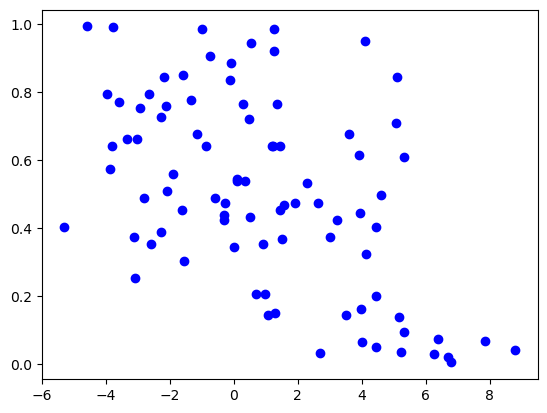

In [159]:
# 'data' is the DataFrame and 'model' is the trained LinearRegression model

# Scatter plot of the actual data
plt.scatter(data['LogBodyWt'], data['TotalSleep'], color='blue', label='Actual Data')

In [160]:
# Calculate the mean values for the other features
mean_brainbody_ratio = data['BrainBodyRatio'].mean()
mean_logbrainwt = data['LogBrainWt'].mean()
mean_lifespan = data['LifeSpan'].mean()
mean_gestation = data["Gestation"].mean()
mean_danger = data["Danger"].mean()

In [161]:
# Creating a DataFrame for predictions, ensuring the column order matches the training data
log_bodywt_range = np.linspace(data['LogBodyWt'].min(), data['LogBodyWt'].max(), 100)
prediction_df = pd.DataFrame({
    'LogBodyWt': log_bodywt_range,
    'LogBrainWt': [mean_logbrainwt] * len(log_bodywt_range),  # mean_logbrainwt defined earlier
    'BrainBodyRatio': [mean_brainbody_ratio] * len(log_bodywt_range),
    'Gestation' : [mean_gestation] * len(log_bodywt_range),
    'Danger' : [mean_danger] * len(log_bodywt_range),
    'LifeSpan' : [mean_lifespan] * len(log_bodywt_range)   # mean_brainbody_ratio defined earlie
})

In [162]:
# Predict 'TotalSleep' using the model for each value in the range
predicted_sleep = model.predict(prediction_df)

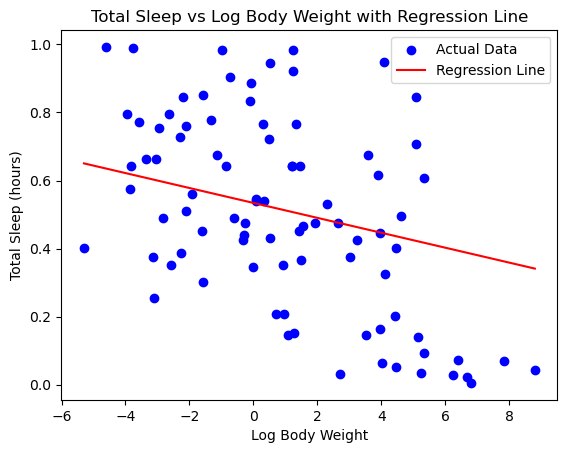

In [163]:
# Create the scatter plot
plt.scatter(data['LogBodyWt'], data['TotalSleep'], color='blue', label='Actual Data')

# Create the regression line plot
plt.plot(log_bodywt_range, predicted_sleep, color='red', label='Regression Line')

# Adding labels, title, and legend
plt.xlabel('Log Body Weight')
plt.ylabel('Total Sleep (hours)')
plt.title('Total Sleep vs Log Body Weight with Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [164]:
from sklearn.preprocessing import PolynomialFeatures

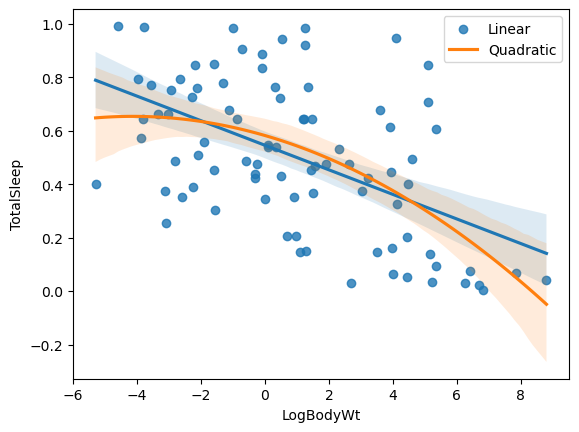

In [165]:
# Confirm that a linear relationship applies 
# Scatter plot with polynomial regression lines
sns.regplot(x='LogBodyWt', y='TotalSleep', data=data, order=1, label='Linear')
sns.regplot(x='LogBodyWt', y='TotalSleep', data=data, order=2, label='Quadratic', scatter=False)
plt.legend()
plt.show()

In [166]:
# Further test regression model using residuals analysis
residuals = y_test - y_pred

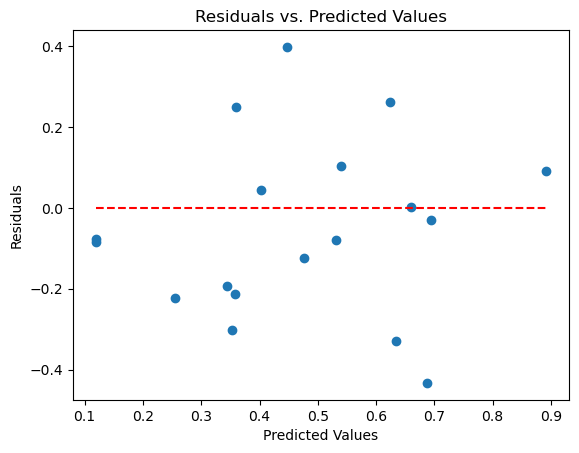

In [167]:
# Residuals vs. Predicted Values
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [ ]:
#!pip install statsmodels

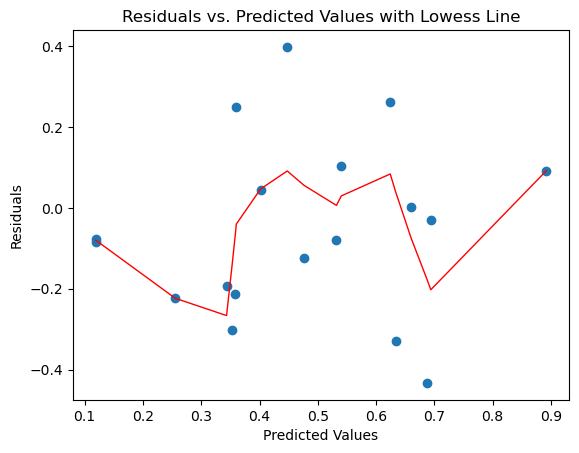

In [168]:
# Residuals vs. Predicted Values with Lowess Line
from statsmodels.nonparametric.smoothers_lowess import lowess

# Calculate lowess line
fraction = 0.3  # Fraction of data to use for smoothing
lowess_line = lowess(residuals, y_pred, frac=fraction)

# Plot
plt.scatter(y_pred, residuals)
plt.plot(lowess_line[:, 0], lowess_line[:, 1], color='red', lw=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values with Lowess Line')
plt.show()

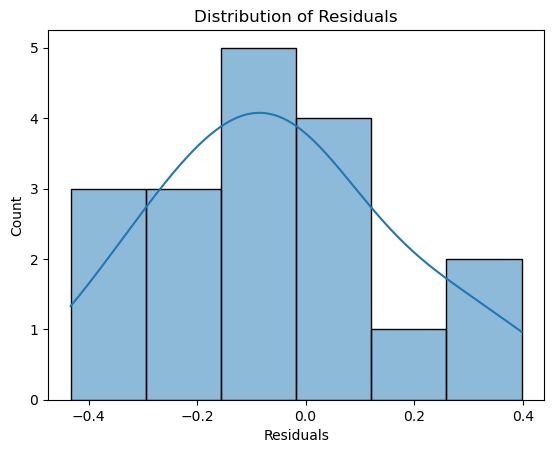

In [169]:
# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

### Residual analysis for Random Forest

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 'TotalSleep' as target and other columns are features
X = data[['LogBodyWt', 'LogBrainWt', 'BrainBodyRatio','Gestation','Danger','LifeSpan']]  # Include other relevant features
y = data['TotalSleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=11)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

min_sleep = data['TotalSleep'].min()
max_sleep = data['TotalSleep'].max()

print(f"Minimum Total Sleep: {min_sleep} hours")
print(f"Maximum Total Sleep: {max_sleep} hours")




Mean Squared Error: 0.06306549681935428
R^2 Score: 0.3294590188123532
Minimum Total Sleep: 0.0049244521797686 hours
Maximum Total Sleep: 0.9928033768905136 hours


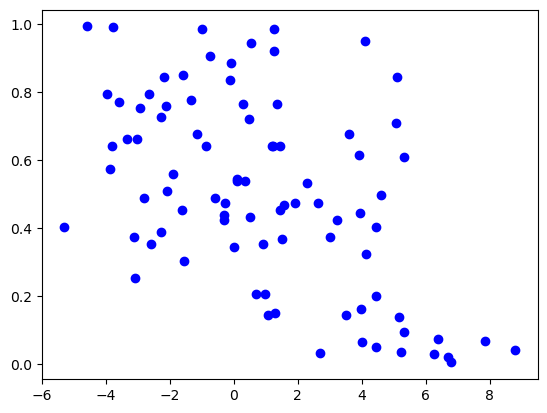

In [171]:
# 'data' is the DataFrame and 'model' is the trained LinearRegression model

# Scatter plot of the actual data
plt.scatter(data['LogBodyWt'], data['TotalSleep'], color='blue', label='Actual Data')

In [172]:
# Further test regression model using residuals analysis
residuals = y_test - y_pred


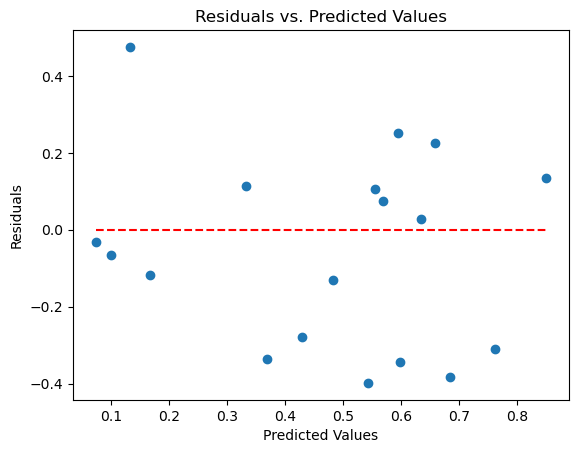

In [173]:
# Residuals vs. Predicted Values
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [174]:
# Residuals vs. Predicted Values with Lowess Line
from statsmodels.nonparametric.smoothers_lowess import lowess

# Calculate lowess line
fraction = 0.3  # Fraction of data to use for smoothing
lowess_line = lowess(residuals, y_pred, frac=fraction)

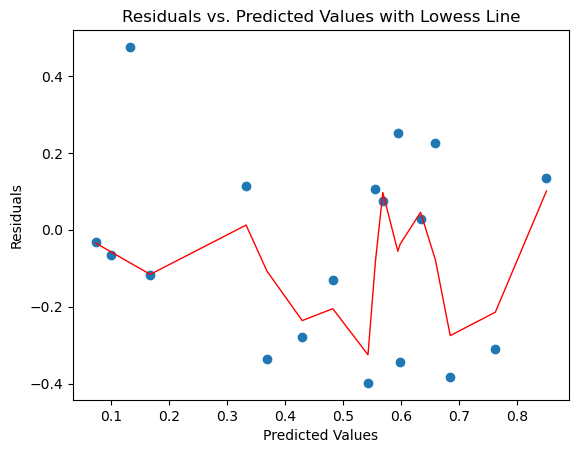

In [175]:
# Plot
plt.scatter(y_pred, residuals)
plt.plot(lowess_line[:, 0], lowess_line[:, 1], color='red', lw=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values with Lowess Line')
plt.show()

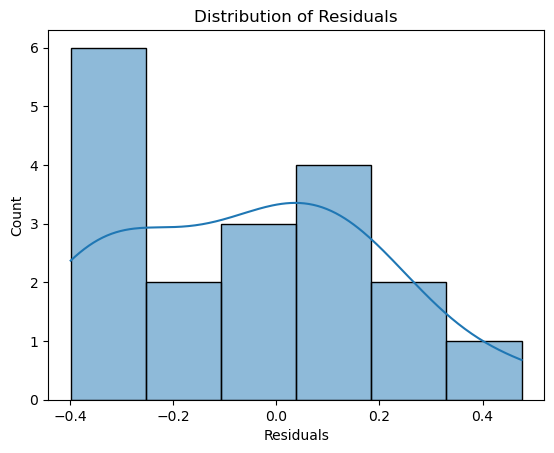

In [176]:
# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()
